# Исследование бронирований по стране, где бронирование было осуществлено

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Добавление столбцов в таблицу

In [2]:
df=pd.read_csv('alldata.csv', encoding = 'UTF-8')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# На базе столбца направление создаем два новых, аэропорт вылета и аэропорт приземления. Например ALKDEL = ALK (код IATA аэропорта вылета) + DEL(код IATA аэропорта назначения)
df['departure_air'] = np.vectorize(lambda s: s[:3])(df['route'])
df['arriving_air'] = np.vectorize(lambda s: s[3:])(df['route'])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure_air,arriving_air
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [4]:
# dataset с кодами IATA аэропортов
airports = pd.read_csv('airports.csv', sep= ';')
airports

,City,Country,Code,Continent
0,Praia,Cape Verde,RAI,Africa
1,Cape Town,South Africa,CPT,Africa
2,Johannesburg - Johannesburg Int'l,South Africa,JNB,Africa
3,Algiers,Algeria,ALG,Africa
4,Annaba,Algeria,AAE,Africa
...,...,...,...,...
1782,Ho Chi Minh City (Saigon),Vietnam,SGN,Southeast Asia
1783,Hue - Phu Bai,Vietnam,HUI,Southeast Asia
1784,Saigon (Ho Chi Minh City),Vietnam,SGN,Southeast Asia
1785,Da Nang,Vietnam,DAD,Southeast Asia


In [5]:
#создаем словарь из ключей, по которому будем вытягивать название страны вылета и прилета
cod_dic = airports.set_index('Code').to_dict()
cod_dic = cod_dic['Country']
cod_dic

{'RAI': 'Cape Verde',
 'CPT': 'South Africa',
 'JNB': 'South Africa',
 'ALG': 'Algeria',
 'AAE': 'Algeria',
 'CZL': 'Algeria',
 'ORN': 'Algeria',
 'BUG': 'Angola',
 'CAB': 'Angola',
 'LAD': 'Angola',
 'COO': 'Benin',
 'FRW': 'Botswana',
 'GBE': 'Botswana',
 'MUB': 'Botswana',
 'PKW': 'Botswana',
 'BOY': 'Burkina Faso',
 'OUA': 'Burkina Faso',
 'SID': 'Cape Verde',
 'BBY': 'Central African Republic',
 'BGU': 'Central African Republic',
 'BGF': 'Central African Republic',
 'BBT': 'Central African Republic',
 'IRO': 'Central African Republic',
 'BIV': 'Central African Republic',
 'CRF': 'Central African Republic',
 'ODA': 'Central African Republic',
 'AEH': 'Chad',
 'MQQ': 'Chad',
 'NDJ': 'Chad',
 'AJN': 'Comoros (Comores)',
 'HAH': 'Comoros (Comores)',
 'YVA': 'Comoros (Comores)',
 'BZV': 'Congo',
 'PNR': 'Congo',
 'FIH': 'Congo (Zaire)',
 'LIQ': 'Congo, Democratic Republic of The',
 'ASK': "C?te d'Ivoire (Ivory Coast)",
 'JIB': 'Djibouti',
 'AUE': 'Egypt',
 'ABS': 'Egypt',
 'AAC': 'Egyp

In [6]:
# Создаем отдельные столбцы со страной вылета и прилета
df['departure_country'] = df['departure_air'].apply(lambda key: cod_dic.get(key))
df['arriving_country'] = df['arriving_air'].apply(lambda key: cod_dic.get(key))
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure_air,arriving_air,departure_country,arriving_country
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL,New Zealand,India
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL,New Zealand,India
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL,New Zealand,India
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL,New Zealand,India
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL,New Zealand,India


In [7]:
# корректируем порядок столбцов в таблице
df = df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route', 'departure_air', 'arriving_air', 'departure_country',
       'arriving_country', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,departure_air,arriving_air,departure_country,arriving_country,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,0
49277,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,0,5.62,0
49278,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,1,5.62,0
49279,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,0


In [8]:
# проверка на пустые значения
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
departure_air            0
arriving_air             0
departure_country        0
arriving_country         0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# 2. Определяем топ стран

In [9]:
df.booking_origin.value_counts().head(10)

booking_origin
Australia      17691
Malaysia        7055
South Korea     4502
Japan           3819
China           3284
Indonesia       2317
Taiwan          2042
Thailand        1993
India           1258
New Zealand     1060
Name: count, dtype: int64

**Топ 10 стран по доле неуспешных бронирований**

In [10]:
country = df.groupby('booking_complete')['booking_origin'].value_counts().to_frame().reset_index()
country.head(15)

,booking_complete,booking_origin,count
0,0,Australia,16796
1,0,Malaysia,4621
2,0,South Korea,4043
3,0,Japan,3347
4,0,China,2600
5,0,Taiwan,1822
6,0,Indonesia,1708
7,0,Thailand,1529
8,0,India,1130
9,0,New Zealand,1007


In [11]:
country = df.groupby('booking_complete')['booking_origin'].value_counts(normalize=True).to_frame().reset_index()
top_10_fail = country[country['booking_complete'] == 0].sort_values('proportion', ascending = False)[:10]
print(top_10_fail['proportion'].sum())
top_10_fail

0.9215325853425639


,booking_complete,booking_origin,proportion
0,0,Australia,0.400955
1,0,Malaysia,0.110313
2,0,South Korea,0.096515
3,0,Japan,0.079900
4,0,China,0.062067
5,0,Taiwan,0.043495
6,0,Indonesia,0.040773
7,0,Thailand,0.036500
8,0,India,0.026975
9,0,New Zealand,0.024039


**Топ 10 стран по доле успешных бронирований**

In [12]:
top_10_success = country[country['booking_complete'] == 1].sort_values('proportion', ascending = False)[:10]
print(top_10_success['proportion'].sum())
top_10_success

0.9010959274793668


,booking_complete,booking_origin,proportion
100,1,Malaysia,0.329319
101,1,Australia,0.121093
102,1,China,0.092545
103,1,Indonesia,0.082398
104,1,Japan,0.063861
105,1,Thailand,0.062779
106,1,South Korea,0.062103
107,1,Singapore,0.039913
108,1,Taiwan,0.029766
109,1,India,0.017318


**Сравнение успешных и неуспешных бронирований по долям из топ-10 стран**

<Axes: xlabel='booking_complete', ylabel='proportion'>

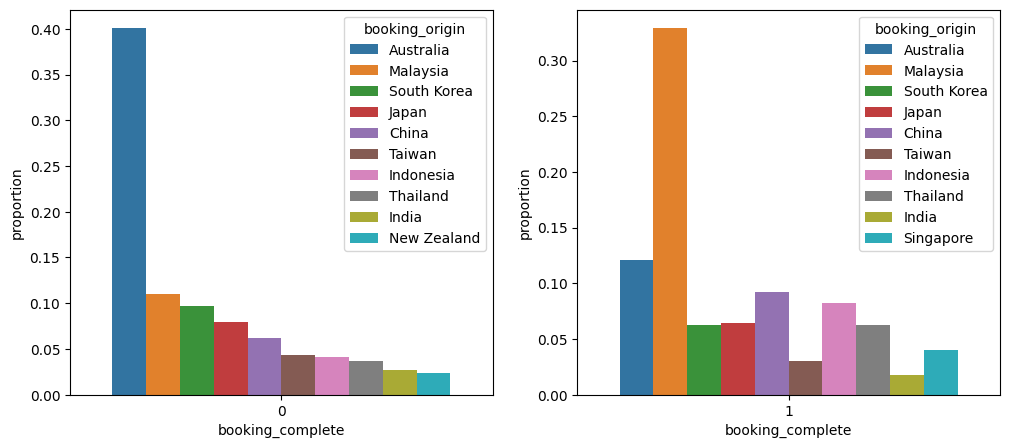

In [13]:
plt.figure(figsize=(12,5))
country_order = ['Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Taiwan', 'Indonesia', 'Thailand', 'India', 'New Zealand']
plt.subplot(1, 2, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'booking_origin', data=top_10_fail, errorbar = None, hue_order = country_order)
plt.subplot(1, 2, 2)
sns.barplot(x='booking_complete', y='proportion', hue = 'booking_origin', data=top_10_success, errorbar = None, 
hue_order = ['Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Taiwan', 'Indonesia', 'Thailand', 'India', 'Singapore'])

# 3. Бронирования по странам 

In [14]:
countries = df.groupby('booking_complete')['booking_origin'].value_counts().to_frame().reset_index()
countries

,booking_complete,booking_origin,count
0,0,Australia,16796
1,0,Malaysia,4621
2,0,South Korea,4043
3,0,Japan,3347
4,0,China,2600
...,...,...,...
153,1,Iraq,1
154,1,Kenya,1
155,1,Pakistan,1
156,1,Mexico,1


## В натуральном выражении

### Australia

In [15]:
Au = countries[countries['booking_origin']=='Australia']
Au['rate'] = Au['count']/Au['count'].sum()
Au

C:\Users\User\AppData\Local\Temp\ipykernel_12472\723272528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Au['rate'] = Au['count']/Au['count'].sum()


,booking_complete,booking_origin,count,rate
0,0,Australia,16796,0.949409
101,1,Australia,895,0.050591


### New Zealand

In [16]:
NZ = countries[countries['booking_origin']=='New Zealand']
NZ['rate'] = NZ['count']/NZ['count'].sum()
NZ

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1784041218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NZ['rate'] = NZ['count']/NZ['count'].sum()


,booking_complete,booking_origin,count,rate
9,0,New Zealand,1007,0.95
115,1,New Zealand,53,0.05


### South Korea

In [17]:
SK = countries[countries['booking_origin']=='South Korea']
SK['rate'] = SK['count']/SK['count'].sum()
SK

C:\Users\User\AppData\Local\Temp\ipykernel_12472\2855249985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SK['rate'] = SK['count']/SK['count'].sum()


,booking_complete,booking_origin,count,rate
2,0,South Korea,4043,0.898045
106,1,South Korea,459,0.101955


### Singapore

In [18]:
SP = countries[countries['booking_origin']=='Singapore']
SP['rate'] = SP['count']/SP['count'].sum()
SP

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1790624104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP['rate'] = SP['count']/SP['count'].sum()


,booking_complete,booking_origin,count,rate
10,0,Singapore,739,0.7147
107,1,Singapore,295,0.2853


### China

In [19]:
CN = countries[countries['booking_origin']=='China']
CN['rate'] = CN['count']/CN['count'].sum()
CN

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1406544177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CN['rate'] = CN['count']/CN['count'].sum()


,booking_complete,booking_origin,count,rate
4,0,China,2600,0.791717
102,1,China,684,0.208283


### Malaysia

In [20]:
ML = countries[countries['booking_origin']=='Malaysia']
ML['rate'] = ML['count']/ML['count'].sum()
ML

C:\Users\User\AppData\Local\Temp\ipykernel_12472\2135057686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML['rate'] = ML['count']/ML['count'].sum()


,booking_complete,booking_origin,count,rate
1,0,Malaysia,4621,0.654996
100,1,Malaysia,2434,0.345004


### Indonesia

In [21]:
IN = countries[countries['booking_origin']=='Indonesia']
IN['rate'] = IN['count']/IN['count'].sum()
IN

C:\Users\User\AppData\Local\Temp\ipykernel_12472\915023999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IN['rate'] = IN['count']/IN['count'].sum()


,booking_complete,booking_origin,count,rate
6,0,Indonesia,1708,0.73716
103,1,Indonesia,609,0.26284


### Thailand

In [22]:
TH = countries[countries['booking_origin']=='Thailand']
TH['rate'] = TH['count']/TH['count'].sum()
TH

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1403998167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TH['rate'] = TH['count']/TH['count'].sum()


,booking_complete,booking_origin,count,rate
7,0,Thailand,1529,0.767185
105,1,Thailand,464,0.232815


### Japan

In [23]:
JP = countries[countries['booking_origin']=='Japan']
JP['rate'] = JP['count']/JP['count'].sum()
JP

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1833351884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JP['rate'] = JP['count']/JP['count'].sum()


,booking_complete,booking_origin,count,rate
3,0,Japan,3347,0.876407
104,1,Japan,472,0.123593


### Taiwan

In [24]:
TW = countries[countries['booking_origin']=='Taiwan']
TW['rate'] = TW['count']/TW['count'].sum()
TW

C:\Users\User\AppData\Local\Temp\ipykernel_12472\3215342814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TW['rate'] = TW['count']/TW['count'].sum()


,booking_complete,booking_origin,count,rate
5,0,Taiwan,1822,0.892262
108,1,Taiwan,220,0.107738


### India

In [25]:
ID = countries[countries['booking_origin']=='India']
ID['rate'] = ID['count']/ID['count'].sum()
ID

C:\Users\User\AppData\Local\Temp\ipykernel_12472\659755668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID['rate'] = ID['count']/ID['count'].sum()


,booking_complete,booking_origin,count,rate
8,0,India,1130,0.898251
109,1,India,128,0.101749


In [26]:
### 

## График долей успешных и неуспешных по странам

<Axes: title={'center': 'China'}, xlabel='booking_complete', ylabel='rate'>

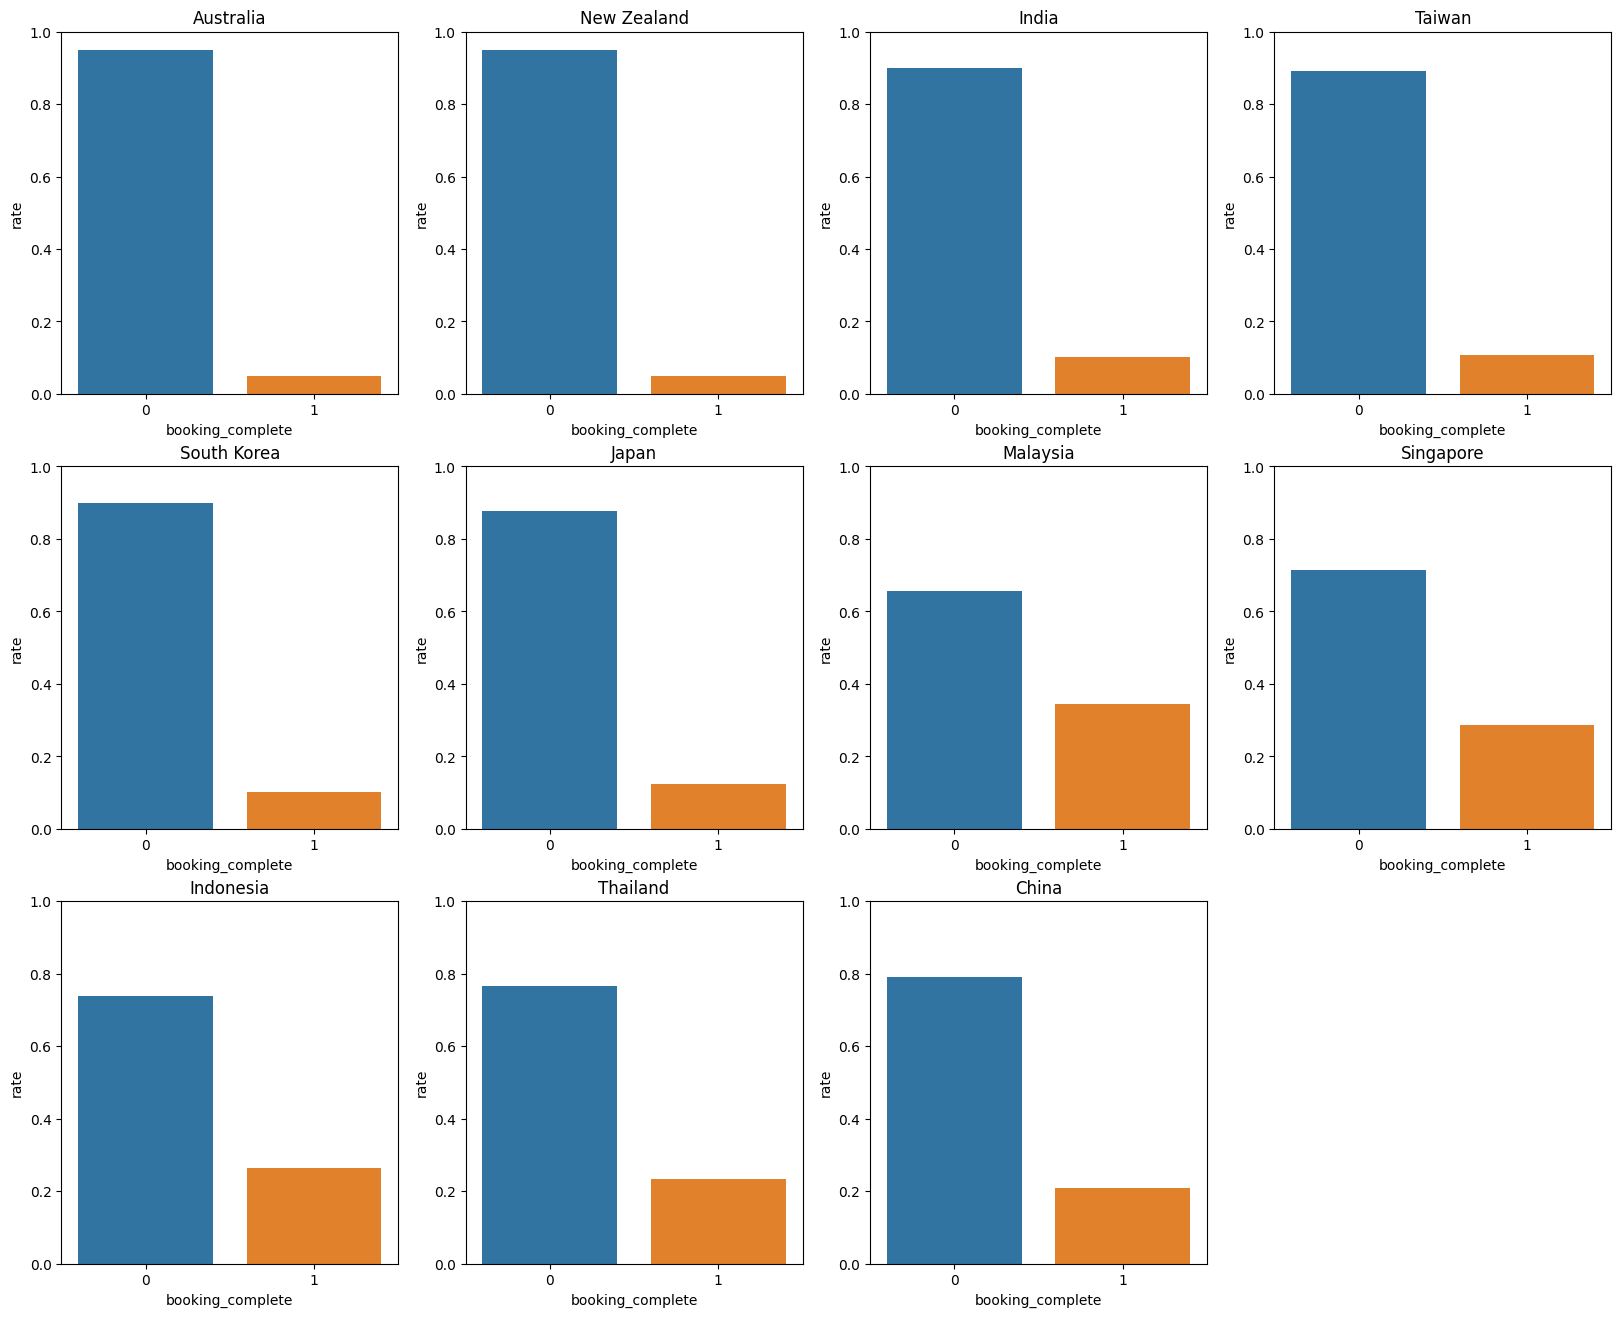

In [27]:
plt.figure(figsize = (20,16))
plt.subplot(3,4,1)
plt.title('Australia')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = Au )
plt.subplot(3,4,2)
plt.title('New Zealand')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = NZ )
plt.subplot(3,4,3)
plt.title('India')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = ID )
plt.subplot(3,4,4)
plt.title('Taiwan')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = TW )
plt.subplot(3,4,5)
plt.title('South Korea')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = SK )
plt.subplot(3,4,6)
plt.title('Japan')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = JP )
plt.subplot(3,4,7)
plt.title('Malaysia')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = ML )
plt.subplot(3,4,8)
plt.title('Singapore')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = SP )
plt.subplot(3,4,9)
plt.title('Indonesia')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = IN )
plt.subplot(3,4,10)
plt.title('Thailand')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = TH )
plt.subplot(3,4,11)
plt.title('China')
plt.ylim([0, 1])
sns.barplot(x = 'booking_complete', y = 'rate', data = CN )



In [28]:
route = df[['booking_origin', 'route', 'booking_complete']]
route
#flight_route = df.groupby(['booking_complete', 'booking_origin', 'route']).value_counts().reset_index() 
#flight_route

,booking_origin,route,booking_complete
0,New Zealand,AKLDEL,0
1,New Zealand,AKLDEL,0
2,India,AKLDEL,0
3,New Zealand,AKLDEL,0
4,India,AKLDEL,0
...,...,...,...
49276,Australia,PERPNH,0
49277,Australia,PERPNH,0
49278,Australia,PERPNH,0
49279,Australia,PERPNH,0


In [29]:
route.groupby(['booking_complete', 'booking_origin', 'route']).value_counts().to_frame()

count
booking_complete booking_origin route        
0                (not set)      AKLKUL      3
                                BKIICN      1
                                CEBMEL      1
                                CGKHND      1
                                CGKICN      1
...                                       ...
1                Vietnam        MRUSIN      1
                                OOLSGN     10
                                PERSGN     12
                                PVGSGN      2
                                SGNSYD     22

[4040 rows x 1 columns]

## Австралия. Анализ бронирований

In [30]:
AU_routes_fail = route.query("booking_origin == 'Australia' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()

In [31]:
AU_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(AU_routes_fail['route'])
AU_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(AU_routes_fail['route'])
AU_routes_fail

,route,booking_origin,fail,departure_air,arriving_air
0,MELSGN,697,697,MEL,SGN
1,DMKOOL,521,521,DMK,OOL
2,DMKPER,515,515,DMK,PER
3,SGNSYD,485,485,SGN,SYD
4,COKSYD,442,442,COK,SYD
...,...,...,...,...,...
342,HKTPEK,1,1,HKT,PEK
343,HKTPVG,1,1,HKT,PVG
344,HNDIKA,1,1,HND,IKA
345,HNDPEN,1,1,HND,PEN


In [32]:
AU_routes_fail.head(10)
# таблица по направлениям с неуспешными бронированиями из Австралии.

,route,booking_origin,fail,departure_air,arriving_air
0,MELSGN,697,697,MEL,SGN
1,DMKOOL,521,521,DMK,OOL
2,DMKPER,515,515,DMK,PER
3,SGNSYD,485,485,SGN,SYD
4,COKSYD,442,442,COK,SYD
5,CMBMEL,411,411,CMB,MEL
6,COKMEL,394,394,COK,MEL
7,DMKSYD,361,361,DMK,SYD
8,PERSGN,307,307,PER,SGN
9,COKPER,305,305,COK,PER


In [33]:
AU_routes_success = route.query("booking_origin == 'Australia' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()

In [34]:
AU_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(AU_routes_success['route'])
AU_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(AU_routes_success['route'])
AU_routes_success

,route,booking_origin,success,departure_air,arriving_air
0,SGNSYD,38,38,SGN,SYD
1,MELPEN,24,24,MEL,PEN
2,OOLSGN,24,24,OOL,SGN
3,COKSYD,23,23,COK,SYD
4,COKMEL,23,23,COK,MEL
...,...,...,...,...,...
204,HGHOOL,1,1,HGH,OOL
205,HGHPER,1,1,HGH,PER
206,MELMYY,1,1,MEL,MYY
207,MELMRU,1,1,MEL,MRU


In [35]:
AU_routes_fail['departure_country'] = AU_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key))
AU_routes_fail['arriving_country'] = AU_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key))


In [36]:
AU_routes_fail

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,MELSGN,697,697,MEL,SGN,Australia,Vietnam
1,DMKOOL,521,521,DMK,OOL,Thailand,Australia
2,DMKPER,515,515,DMK,PER,Thailand,Australia
3,SGNSYD,485,485,SGN,SYD,Vietnam,Australia
4,COKSYD,442,442,COK,SYD,India,Australia
...,...,...,...,...,...,...,...
342,HKTPEK,1,1,HKT,PEK,Thailand,China
343,HKTPVG,1,1,HKT,PVG,Thailand,China
344,HNDIKA,1,1,HND,IKA,Japan,Iran
345,HNDPEN,1,1,HND,PEN,Japan,Malaysia


In [37]:
AU_routes_success['departure_country'] = AU_routes_success['departure_air'].apply(lambda key: cod_dic.get(key))
AU_routes_success['arriving_country'] = AU_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key))

In [38]:
AU_routes_success

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,SGNSYD,38,38,SGN,SYD,Vietnam,Australia
1,MELPEN,24,24,MEL,PEN,Australia,Malaysia
2,OOLSGN,24,24,OOL,SGN,Australia,Vietnam
3,COKSYD,23,23,COK,SYD,India,Australia
4,COKMEL,23,23,COK,MEL,India,Australia
...,...,...,...,...,...,...,...
204,HGHOOL,1,1,HGH,OOL,China,Australia
205,HGHPER,1,1,HGH,PER,China,Australia
206,MELMYY,1,1,MEL,MYY,Australia,Malaysia
207,MELMRU,1,1,MEL,MRU,Australia,Mauritius


In [40]:
AU_routes_fail.groupby(['departure_country', 'departure_air']).agg({'booking_origin' : 'sum'})


booking_origin
departure_country departure_air                
Australia         MEL                      2093
                  OOL                       706
                  PER                      1037
                  SYD                       232
Bangladesh        DAC                       280
...                                         ...
Thailand          HKT                      1030
                  KBV                       107
Vietnam           DAD                       129
                  HAN                       119
                  SGN                       485

[75 rows x 1 columns]

In [41]:
AU_routes_fail.groupby(['departure_country', 'arriving_country']).agg({'booking_origin' : 'sum'}).index


MultiIndex([(      'Australia',        'Cambodia'),
            (      'Australia',           'China'),
            (      'Australia',           'India'),
            (      'Australia',       'Indonesia'),
            (      'Australia',            'Laos'),
            (      'Australia',        'Malaysia'),
            (      'Australia',       'Maledives'),
            (      'Australia',       'Mauritius'),
            (      'Australia', 'Myanmar (Burma)'),
            (      'Australia',     'Philippines'),
            (      'Australia',       'Singapore'),
            (      'Australia',     'South Korea'),
            (      'Australia',          'Taiwan'),
            (      'Australia',        'Thailand'),
            (      'Australia',         'Vietnam'),
            (     'Bangladesh',       'Australia'),
            (         'Brunei',       'Australia'),
            (       'Cambodia',       'Australia'),
            (          'China',       'Australia'),
            

In [42]:
# сколько было успешных бронирований, сделанных в Австралии по маршруту Малайзия-Австралия
AU_routes_success.groupby(['arriving_country','departure_country']).agg({'booking_origin' : 'sum'}).loc[(  'Australia',    'Malaysia')]

booking_origin    91
Name: (Australia, Malaysia), dtype: int64

In [43]:
# сколько было успешных бронирований, сделанных в Австралии по маршруту Австралия-Малайзия
AU_routes_success.groupby(['arriving_country','departure_country']).agg({'booking_origin' : 'sum'}).loc[(  'Malaysia', 'Australia')]

booking_origin    39
Name: (Malaysia, Australia), dtype: int64

In [44]:
AU_routes_fail['arriving_country'].value_counts()

arriving_country
Australia          211
China               28
Malaysia            20
Taiwan              13
Japan               10
India                9
South Korea          9
Indonesia            7
Cambodia             6
Singapore            6
Thailand             6
Iran                 5
Laos                 4
Vietnam              4
Myanmar (Burma)      4
Mauritius            2
Maledives            1
Nepal                1
Philippines          1
Name: count, dtype: int64

In [45]:
AU_first_fail = AU_routes_fail[AU_routes_fail['departure_country'] == 'Australia']
AU_first_fail['fail'].sum()

4068

In [46]:
AU_second_fail = AU_routes_fail[AU_routes_fail['arriving_country'] == 'Australia']
AU_second_fail['fail'].sum()

12625

In [47]:
print(AU_first_fail['fail'].sum()/Au.loc[0]['count']*100) # доля неуспешных из Австралии, где аэропорт вылета - Австралия
print(AU_second_fail['fail'].sum()/Au.loc[0]['count']*100) # доля неуспешных из Австралии, где аэропорт прилета - Австралия

24.220052393427004
75.16670635865682


In [48]:
AU_first_success = AU_routes_success[AU_routes_success['departure_country'] == 'Australia']
AU_first_success['success'].sum()

212

In [49]:
AU_second_success = AU_routes_success[AU_routes_success['arriving_country'] == 'Australia']
AU_second_success['success'].sum()

658

In [50]:
print(AU_first_success['success'].sum()/Au.loc[101]['count']*100) # доля успешных из Австралии, где аэропорт вылета - Австралия
print(AU_second_success['success'].sum()/Au.loc[101]['count']*100) # доля успешных из Австралии, где аэропорт прилета - Австралия

23.687150837988828
73.5195530726257


## Малайзия. Анализ бронирований

In [51]:
ML_routes_fail = route.query("booking_origin == 'Malaysia' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()

In [52]:
ML_routes_fail

,route,booking_origin,fail
0,AKLKUL,908,908
1,PENTPE,329,329
2,JHBKTM,240,240
3,KTMPEN,191,191
4,MELPEN,190,190
...,...,...,...
237,CTSDMK,1,1
238,HYDOOL,1,1
239,KIXLBU,1,1
240,KHHPER,1,1


In [53]:
ML_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(ML_routes_fail['route'])
ML_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(ML_routes_fail['route'])
ML_routes_fail

,route,booking_origin,fail,departure_air,arriving_air
0,AKLKUL,908,908,AKL,KUL
1,PENTPE,329,329,PEN,TPE
2,JHBKTM,240,240,JHB,KTM
3,KTMPEN,191,191,KTM,PEN
4,MELPEN,190,190,MEL,PEN
...,...,...,...,...,...
237,CTSDMK,1,1,CTS,DMK
238,HYDOOL,1,1,HYD,OOL
239,KIXLBU,1,1,KIX,LBU
240,KHHPER,1,1,KHH,PER


In [54]:
ML_routes_success = route.query("booking_origin == 'Malaysia' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()

In [55]:
ML_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(ML_routes_success['route'])
ML_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(ML_routes_success['route'])
ML_routes_success

,route,booking_origin,success,departure_air,arriving_air
0,AKLKUL,456,456,AKL,KUL
1,PENTPE,265,265,PEN,TPE
2,JHBKTM,158,158,JHB,KTM
3,KTMPEN,116,116,KTM,PEN
4,MELPEN,107,107,MEL,PEN
...,...,...,...,...,...
154,IKAPEN,1,1,IKA,PEN
155,ICNLGK,1,1,ICN,LGK
156,MYYSYD,1,1,MYY,SYD
157,CTUMYY,1,1,CTU,MYY


In [56]:
ML_routes_fail['departure_country'] = ML_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key))
ML_routes_fail['arriving_country'] = ML_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key))
ML_routes_fail

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,AKLKUL,908,908,AKL,KUL,New Zealand,Malaysia
1,PENTPE,329,329,PEN,TPE,Malaysia,Taiwan
2,JHBKTM,240,240,JHB,KTM,Malaysia,Nepal
3,KTMPEN,191,191,KTM,PEN,Nepal,Malaysia
4,MELPEN,190,190,MEL,PEN,Australia,Malaysia
...,...,...,...,...,...,...,...
237,CTSDMK,1,1,CTS,DMK,Japan,Thailand
238,HYDOOL,1,1,HYD,OOL,India,Australia
239,KIXLBU,1,1,KIX,LBU,Japan,Malaysia
240,KHHPER,1,1,KHH,PER,Taiwan,Australia


In [57]:
ML_routes_success['departure_country'] = ML_routes_success['departure_air'].apply(lambda key: cod_dic.get(key))
ML_routes_success['arriving_country'] = ML_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key))
ML_routes_success

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,AKLKUL,456,456,AKL,KUL,New Zealand,Malaysia
1,PENTPE,265,265,PEN,TPE,Malaysia,Taiwan
2,JHBKTM,158,158,JHB,KTM,Malaysia,Nepal
3,KTMPEN,116,116,KTM,PEN,Nepal,Malaysia
4,MELPEN,107,107,MEL,PEN,Australia,Malaysia
...,...,...,...,...,...,...,...
154,IKAPEN,1,1,IKA,PEN,Iran,Malaysia
155,ICNLGK,1,1,ICN,LGK,South Korea,Malaysia
156,MYYSYD,1,1,MYY,SYD,Malaysia,Australia
157,CTUMYY,1,1,CTU,MYY,China,Malaysia


In [58]:
# сколько было успешных бронирований, сделанных в Малайзии по маршруту Малайзия-Австралия
ML_routes_success.groupby(['arriving_country','departure_country']).agg({'booking_origin' : 'sum'}).loc[(  'Australia',    'Malaysia')]

booking_origin    396
Name: (Australia, Malaysia), dtype: int64

In [59]:
# сколько было успешных бронирований, сделанных в Малайзии по маршруту Австралия-Малайзия
ML_routes_success.groupby(['arriving_country','departure_country']).agg({'booking_origin' : 'sum'}).loc[(  'Malaysia', 'Australia')]

booking_origin    176
Name: (Malaysia, Australia), dtype: int64

In [60]:
ML_first_fail = ML_routes_fail[ML_routes_fail['departure_country'] == 'Malaysia']
ML_first_fail['fail'].sum()

2235

In [61]:
ML_second_fail = ML_routes_fail[ML_routes_fail['arriving_country'] == 'Malaysia']
ML_second_fail['fail'].sum()

2268

In [62]:
print(ML_first_fail['fail'].sum()/ML.loc[1]['count']*100) # доля неуспешных из Малайзии, где аэропорт вылета - Малайзия
print(ML_second_fail['fail'].sum()/ML.loc[1]['count']*100) # доля неуспешных из Малайзии, где аэропорт прилета - Малайзия

48.36615451201039
49.080285652456176


In [63]:
ML_first_success = ML_routes_success[ML_routes_success['departure_country'] == 'Malaysia']
ML_first_success['success'].sum()

1233

In [64]:
ML_second_success = ML_routes_success[ML_routes_success['arriving_country'] == 'Malaysia']
ML_second_success['success'].sum()

1164

In [65]:
print(ML_first_success['success'].sum()/ML.loc[100]['count']*100) # доля успешных из Малайзии, где аэропорт вылета - Малайзия
print(ML_second_success['success'].sum()/ML.loc[100]['count']*100) # доля успешных из Малайзии, где аэропорт прилета - Малайзия

50.65735414954807
47.82251437962202


## Южная Корея. Анализ бронирований

In [66]:
SK_routes_fail = route.query("booking_origin == 'South Korea' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
SK_routes_fail

,route,booking_origin,fail
0,DPSICN,550,550
1,ICNSIN,500,500
2,ICNSYD,403,403
3,HKTICN,335,335
4,DPSPUS,204,204
...,...,...,...
90,CGKSYD,1,1
91,CGKPEK,1,1
92,HKGPER,1,1
93,IKAMNL,1,1


In [67]:
SK_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(SK_routes_fail['route'])
SK_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(SK_routes_fail['route'])
SK_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,DPSICN,550,550,DPS,ICN
1,ICNSIN,500,500,ICN,SIN
2,ICNSYD,403,403,ICN,SYD
3,HKTICN,335,335,HKT,ICN
4,DPSPUS,204,204,DPS,PUS


In [68]:
SK_routes_success = route.query("booking_origin == 'South Korea' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
SK_routes_success.head()

,route,booking_origin,success
0,BKIICN,59,59
1,ICNPEN,58,58
2,ICNLGK,57,57
3,ICNMLE,55,55
4,DPSICN,49,49


In [69]:
SK_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(SK_routes_success['route'])
SK_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(SK_routes_success['route'])
SK_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,BKIICN,59,59,BKI,ICN
1,ICNPEN,58,58,ICN,PEN
2,ICNLGK,57,57,ICN,LGK
3,ICNMLE,55,55,ICN,MLE
4,DPSICN,49,49,DPS,ICN


In [70]:
SK_routes_fail['departure_country'] = SK_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key))
SK_routes_fail['arriving_country'] = SK_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key))
SK_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,DPSICN,550,550,DPS,ICN,Indonesia,South Korea
1,ICNSIN,500,500,ICN,SIN,South Korea,Singapore
2,ICNSYD,403,403,ICN,SYD,South Korea,Australia
3,HKTICN,335,335,HKT,ICN,Thailand,South Korea
4,DPSPUS,204,204,DPS,PUS,Indonesia,South Korea


In [71]:
SK_routes_success['departure_country'] = SK_routes_success['departure_air'].apply(lambda key: cod_dic.get(key))
SK_routes_success['arriving_country'] = SK_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key))
SK_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,BKIICN,59,59,BKI,ICN,Malaysia,South Korea
1,ICNPEN,58,58,ICN,PEN,South Korea,Malaysia
2,ICNLGK,57,57,ICN,LGK,South Korea,Malaysia
3,ICNMLE,55,55,ICN,MLE,South Korea,Maledives
4,DPSICN,49,49,DPS,ICN,Indonesia,South Korea


In [72]:
SK_first_fail = SK_routes_fail[SK_routes_fail['departure_country'] == 'South Korea']
SK_first_fail['fail'].sum()

2073

In [73]:
SK_second_fail = SK_routes_fail[SK_routes_fail['arriving_country'] == 'South Korea']
SK_second_fail['fail'].sum()

1936

In [74]:
print(SK_first_fail['fail'].sum()/SK.loc[2]['count']*100) # доля неуспешных из Южной Кореи, где аэропорт вылета - Корея
print(SK_second_fail['fail'].sum()/SK.loc[2]['count']*100) # доля неуспешных изЮжной Кореи, где аэропорт прилета - Корея

51.273806579272815
47.885233737323766


In [75]:
SK_first_success = SK_routes_success[SK_routes_success['departure_country'] == 'South Korea']
SK_first_success['success'].sum()

238

In [76]:
SK_second_success = SK_routes_success[SK_routes_success['arriving_country'] == 'South Korea']
SK_second_success['success'].sum()

214

In [77]:
print(SK_first_success['success'].sum()/SK.loc[106]['count']*100) # доля успешных из Южной Кореи, где аэропорт вылета - Корея
print(SK_second_success['success'].sum()/SK.loc[106]['count']*100) # доля успешных изЮжной Кореи, где аэропорт прилета - Корея

51.85185185185185
46.62309368191721


## Япония. Анализ бронирований

In [78]:
JP_routes_fail = route.query("booking_origin == 'Japan' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
JP_routes_fail.head()

,route,booking_origin,fail
0,DPSKIX,262,262
1,DPSHND,227,227
2,HNDPEN,209,209
3,HKTKIX,163,163
4,HNDSIN,160,160


In [79]:
JP_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(JP_routes_fail['route']) # добавляем столбец с аэропортом вылета
JP_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(JP_routes_fail['route']) # добавляем столбец с аэропортом прилета
JP_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,DPSKIX,262,262,DPS,KIX
1,DPSHND,227,227,DPS,HND
2,HNDPEN,209,209,HND,PEN
3,HKTKIX,163,163,HKT,KIX
4,HNDSIN,160,160,HND,SIN


In [80]:
JP_routes_success = route.query("booking_origin == 'Japan' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
JP_routes_success.head()

,route,booking_origin,success
0,DPSKIX,46,46
1,HNDPEN,33,33
2,DPSHND,31,31
3,DMKKIX,25,25
4,HNDSIN,18,18


In [81]:
JP_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(JP_routes_success['route']) # добавляем столбец с аэропортом вылета
JP_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(JP_routes_success['route']) # добавляем столбец с аэропортом прилета
JP_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,DPSKIX,46,46,DPS,KIX
1,HNDPEN,33,33,HND,PEN
2,DPSHND,31,31,DPS,HND
3,DMKKIX,25,25,DMK,KIX
4,HNDSIN,18,18,HND,SIN


In [82]:
JP_routes_fail['departure_country'] = JP_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
JP_routes_fail['arriving_country'] = JP_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
JP_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,DPSKIX,262,262,DPS,KIX,Indonesia,Japan
1,DPSHND,227,227,DPS,HND,Indonesia,Japan
2,HNDPEN,209,209,HND,PEN,Japan,Malaysia
3,HKTKIX,163,163,HKT,KIX,Thailand,Japan
4,HNDSIN,160,160,HND,SIN,Japan,Singapore


In [83]:
JP_routes_success['departure_country'] = JP_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
JP_routes_success['arriving_country'] = JP_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
JP_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,DPSKIX,46,46,DPS,KIX,Indonesia,Japan
1,HNDPEN,33,33,HND,PEN,Japan,Malaysia
2,DPSHND,31,31,DPS,HND,Indonesia,Japan
3,DMKKIX,25,25,DMK,KIX,Thailand,Japan
4,HNDSIN,18,18,HND,SIN,Japan,Singapore


In [84]:
JP_first_fail = JP_routes_fail[JP_routes_fail['departure_country'] == 'Japan']
JP_second_fail = JP_routes_fail[JP_routes_fail['arriving_country'] == 'Japan']
JP_first_fail['fail'].sum(), JP_second_fail['fail'].sum()

(1632, 1579)

In [85]:
print(JP_first_fail['fail'].sum()/JP.loc[3]['count']*100) # доля неуспешных из Японии, где аэропорт вылета - Японии
print(JP_second_fail['fail'].sum()/JP.loc[3]['count']*100) # доля неуспешных из Японии, где аэропорт прилета - Японии

48.76008365700628
47.1765760382432


In [86]:
JP_first_success = JP_routes_success[JP_routes_success['departure_country'] == 'Japan'] # успешные, где аэропорт вылета Япония
JP_second_success = JP_routes_success[JP_routes_success['arriving_country'] == 'Japan'] # успешные, где аэропорт прилета Япония
JP_first_success['success'].sum(), JP_second_success['success'].sum()

(225, 228)

In [87]:
print(JP_first_success['success'].sum()/JP.loc[104]['count']*100) # доля успешных из Японии, где аэропорт вылета - Японии
print(JP_second_success['success'].sum()/JP.loc[104]['count']*100) # доля успешных из Японии, где аэропорт прилета - Японии

47.66949152542373
48.30508474576271


## Индонезия. Анализ бронирований

In [88]:
# Создаем таблицу с неуспешными бронированиями, оформленными из Индонезии
IN_routes_fail = route.query("booking_origin == 'Indonesia' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
IN_routes_fail.head()

,route,booking_origin,fail
0,CGKICN,179,179
1,CGKHND,152,152
2,CGKKIX,130,130
3,CGKPEK,66,66
4,KNOTPE,66,66


In [89]:
# Добавляем столбцы с аэропортами выдета и прилета
IN_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(IN_routes_fail['route']) # добавляем столбец с аэропортом вылета
IN_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(IN_routes_fail['route']) # добавляем столбец с аэропортом прилета
IN_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,CGKICN,179,179,CGK,ICN
1,CGKHND,152,152,CGK,HND
2,CGKKIX,130,130,CGK,KIX
3,CGKPEK,66,66,CGK,PEK
4,KNOTPE,66,66,KNO,TPE


In [90]:
# Создаем таблицу с успешными бронированиями, оформленными из Индонезии
IN_routes_success = route.query("booking_origin == 'Indonesia' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
IN_routes_success.head()

,route,booking_origin,success
0,CGKHND,83,83
1,CGKKIX,77,77
2,CGKICN,73,73
3,CGKMEL,23,23
4,CGKPEK,20,20


In [91]:
# Добавляем столбцы с аэропортами выдета и прилета
IN_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(IN_routes_success['route']) # добавляем столбец с аэропортом вылета
IN_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(IN_routes_success['route']) # добавляем столбец с аэропортом прилета
IN_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,CGKHND,83,83,CGK,HND
1,CGKKIX,77,77,CGK,KIX
2,CGKICN,73,73,CGK,ICN
3,CGKMEL,23,23,CGK,MEL
4,CGKPEK,20,20,CGK,PEK


In [92]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований из Индонезии
IN_routes_fail['departure_country'] = IN_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
IN_routes_fail['arriving_country'] = IN_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
IN_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,CGKICN,179,179,CGK,ICN,Indonesia,South Korea
1,CGKHND,152,152,CGK,HND,Indonesia,Japan
2,CGKKIX,130,130,CGK,KIX,Indonesia,Japan
3,CGKPEK,66,66,CGK,PEK,Indonesia,China
4,KNOTPE,66,66,KNO,TPE,Indonesia,Taiwan


In [93]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований из Индонезии
IN_routes_success['departure_country'] = IN_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
IN_routes_success['arriving_country'] = IN_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
IN_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,CGKHND,83,83,CGK,HND,Indonesia,Japan
1,CGKKIX,77,77,CGK,KIX,Indonesia,Japan
2,CGKICN,73,73,CGK,ICN,Indonesia,South Korea
3,CGKMEL,23,23,CGK,MEL,Indonesia,Australia
4,CGKPEK,20,20,CGK,PEK,Indonesia,China


In [94]:
# сравниваем количество неуспешных по стране вылета
IN_first_fail = IN_routes_fail[IN_routes_fail['departure_country'] == 'Indonesia']
IN_second_fail = IN_routes_fail[IN_routes_fail['arriving_country'] == 'Indonesia']
IN_first_fail['fail'].sum(), IN_second_fail['fail'].sum()

(1329, 288)

In [95]:
# сравниваем процент неуспешных по стране вылета
print(IN_first_fail['fail'].sum()/IN.loc[6]['count']*100) # доля неуспешных из Индонезии, где аэропорт вылета - Индонезия
print(IN_second_fail['fail'].sum()/IN.loc[6]['count']*100) # доля неуспешных из Индонезии, где аэропорт прилета - Индонезия

77.81030444964871
16.861826697892273


In [96]:
# сравниваем количество успешных по стране вылета
IN_first_success = IN_routes_success[IN_routes_success['departure_country'] == 'Indonesia']
IN_second_success = IN_routes_success[IN_routes_success['arriving_country'] == 'Indonesia']
IN_first_success['success'].sum(), IN_second_success['success'].sum()

(514, 78)

In [97]:
# сравниваем количество успешных по стране вылета
print(IN_first_success['success'].sum()/IN.loc[103]['count']*100) # доля неуспешных из Индонезии, где аэропорт вылета - Индонезия
print(IN_second_success['success'].sum()/IN.loc[103]['count']*100) # доля неуспешных из Индонезии, где аэропорт прилета - Индонезия

84.40065681444992
12.807881773399016


## Tайвань. Анализ бронирований

In [98]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Тайване
TW_routes_fail = route.query("booking_origin == 'Taiwan' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
TW_routes_fail.head()

,route,booking_origin,fail
0,MELTPE,321,321
1,PENTPE,159,159
2,DPSTPE,151,151
3,KNOTPE,116,116
4,SYDTPE,95,95


In [99]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Тайване
TW_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(TW_routes_fail['route']) # добавляем столбец с аэропортом вылета
TW_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(TW_routes_fail['route']) # добавляем столбец с аэропортом прилета
TW_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,MELTPE,321,321,MEL,TPE
1,PENTPE,159,159,PEN,TPE
2,DPSTPE,151,151,DPS,TPE
3,KNOTPE,116,116,KNO,TPE
4,SYDTPE,95,95,SYD,TPE


In [100]:
# Создаем таблицу с успешными бронированиями, оформленными в Тайване
TW_routes_success = route.query("booking_origin == 'Taiwan' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
TW_routes_success.head()

,route,booking_origin,success
0,PENTPE,110,110
1,LGKTPE,19,19
2,KCHTPE,17,17
3,SBWTPE,16,16
4,TGGTPE,10,10


In [101]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Тайване
TW_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(TW_routes_success['route']) # добавляем столбец с аэропортом вылета
TW_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(TW_routes_success['route']) # добавляем столбец с аэропортом прилета
TW_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,PENTPE,110,110,PEN,TPE
1,LGKTPE,19,19,LGK,TPE
2,KCHTPE,17,17,KCH,TPE
3,SBWTPE,16,16,SBW,TPE
4,TGGTPE,10,10,TGG,TPE


In [102]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Тайване
TW_routes_fail['departure_country'] = TW_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
TW_routes_fail['arriving_country'] = TW_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
TW_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,MELTPE,321,321,MEL,TPE,Australia,Taiwan
1,PENTPE,159,159,PEN,TPE,Malaysia,Taiwan
2,DPSTPE,151,151,DPS,TPE,Indonesia,Taiwan
3,KNOTPE,116,116,KNO,TPE,Indonesia,Taiwan
4,SYDTPE,95,95,SYD,TPE,Australia,Taiwan


In [103]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Тайване
TW_routes_success['departure_country'] = TW_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
TW_routes_success['arriving_country'] = TW_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
TW_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,PENTPE,110,110,PEN,TPE,Malaysia,Taiwan
1,LGKTPE,19,19,LGK,TPE,Malaysia,Taiwan
2,KCHTPE,17,17,KCH,TPE,Malaysia,Taiwan
3,SBWTPE,16,16,SBW,TPE,Malaysia,Taiwan
4,TGGTPE,10,10,TGG,TPE,Malaysia,Taiwan


In [104]:
# сравниваем количество неуспешных бронирований в Тайване по стране вылета и прилета
TW_first_fail = TW_routes_fail[TW_routes_fail['departure_country'] == 'Taiwan']
TW_second_fail = TW_routes_fail[TW_routes_fail['arriving_country'] == 'Taiwan']
TW_first_fail['fail'].sum(), TW_second_fail['fail'].sum()

(45, 1752)

In [105]:
# сравниваем процент неуспешных бронирований в Тайване по стране вылета и прилета
print(TW_first_fail['fail'].sum()/TW.loc[5]['count']*100) # доля неуспешных из Тайвань, где аэропорт вылета - Тайвань
print(TW_second_fail['fail'].sum()/TW.loc[5]['count']*100) # доля неуспешных из Тайвань, где аэропорт прилета - Тайвань

2.469813391877058
96.15806805708014


In [106]:
# сравниваем количество успешных бронирований в Тайване по стране вылета и прилета
TW_first_success = TW_routes_success[TW_routes_success['departure_country'] == 'Taiwan']
TW_second_success = TW_routes_success[TW_routes_success['arriving_country'] == 'Taiwan']
TW_first_success['success'].sum(), TW_second_success['success'].sum()

(3, 209)

In [107]:
# сравниваем количество успешных бронирований в Тайване по стране вылета и прилета
print(TW_first_success['success'].sum()/TW.loc[108]['count']*100) # доля успешных из Тайвань, где аэропорт вылета - Тайвань
print(TW_second_success['success'].sum()/TW.loc[108]['count']*100) # доля успешных из Тайвань, где аэропорт прилета - Тайвань

1.3636363636363635
95.0


## Китай. Анализ бронирований

In [108]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Китае
CN_routes_fail = route.query("booking_origin == 'China' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
CN_routes_fail.head()

,route,booking_origin,fail
0,DPSPVG,247,247
1,DPSPEK,148,148
2,HKTPEK,131,131
3,PEKTWU,80,80
4,PENPVG,69,69


In [109]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Китае
CN_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(CN_routes_fail['route']) # добавляем столбец с аэропортом вылета
CN_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(CN_routes_fail['route']) # добавляем столбец с аэропортом прилета
CN_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,DPSPVG,247,247,DPS,PVG
1,DPSPEK,148,148,DPS,PEK
2,HKTPEK,131,131,HKT,PEK
3,PEKTWU,80,80,PEK,TWU
4,PENPVG,69,69,PEN,PVG


In [110]:
# Создаем таблицу с успешными бронированиями, оформленными в Китае
CN_routes_success = route.query("booking_origin == 'China' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
CN_routes_success.head()

,route,booking_origin,success
0,DPSPVG,73,73
1,DPSPEK,43,43
2,DPSHGH,29,29
3,PENPVG,24,24
4,HKTPEK,24,24


In [111]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Китае
CN_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(CN_routes_success['route']) # добавляем столбец с аэропортом вылета
CN_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(CN_routes_success['route']) # добавляем столбец с аэропортом прилета
CN_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,DPSPVG,73,73,DPS,PVG
1,DPSPEK,43,43,DPS,PEK
2,DPSHGH,29,29,DPS,HGH
3,PENPVG,24,24,PEN,PVG
4,HKTPEK,24,24,HKT,PEK


In [112]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Китае
CN_routes_fail['departure_country'] = CN_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
CN_routes_fail['arriving_country'] = CN_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
CN_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,DPSPVG,247,247,DPS,PVG,Indonesia,China
1,DPSPEK,148,148,DPS,PEK,Indonesia,China
2,HKTPEK,131,131,HKT,PEK,Thailand,China
3,PEKTWU,80,80,PEK,TWU,China,Malaysia
4,PENPVG,69,69,PEN,PVG,Malaysia,China


In [113]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Китае
CN_routes_success['departure_country'] = CN_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
CN_routes_success['arriving_country'] = CN_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
CN_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,DPSPVG,73,73,DPS,PVG,Indonesia,China
1,DPSPEK,43,43,DPS,PEK,Indonesia,China
2,DPSHGH,29,29,DPS,HGH,Indonesia,China
3,PENPVG,24,24,PEN,PVG,Malaysia,China
4,HKTPEK,24,24,HKT,PEK,Thailand,China


In [114]:
CN_routes_success.groupby(['arriving_country','departure_country']).agg({'booking_origin' : 'sum'}).loc[(  'Australia', 'China')]

booking_origin    37
Name: (Australia, China), dtype: int64

In [115]:
# сравниваем количество неуспешных бронирований в Китае по стране вылета и прилета
CN_first_fail = CN_routes_fail[CN_routes_fail['departure_country'] == 'China']
CN_second_fail = CN_routes_fail[CN_routes_fail['arriving_country'] == 'China']
CN_first_fail['fail'].sum(), CN_second_fail['fail'].sum()

(895, 1647)

In [116]:
# сравниваем процент неуспешных бронирований в Китае по стране вылета и прилета
print(CN_first_fail['fail'].sum()/CN.loc[4]['count']*100) # доля неуспешных из Китая, где аэропорт вылета - Китай
print(CN_second_fail['fail'].sum()/CN.loc[4]['count']*100) # доля неуспешных из Китая, где аэропорт прилета - Китай

34.42307692307692
63.34615384615384


In [117]:
# сравниваем количество успешных бронирований в Китае по стране вылета и прилета
CN_first_success = CN_routes_success[CN_routes_success['departure_country'] == 'China']
CN_second_success = CN_routes_success[CN_routes_success['arriving_country'] == 'China']
CN_first_success['success'].sum(), CN_second_success['success'].sum()

(213, 460)

In [118]:
# сравниваем количество успешных бронирований в Китае по стране вылета и прилета
print(CN_first_success['success'].sum()/CN.loc[102]['count']*100) # доля успешных из Китая, где аэропорт вылета - Китай
print(CN_second_success['success'].sum()/CN.loc[102]['count']*100) # доля успешных из Китая, где аэропорт прилета - Китай

31.140350877192986
67.2514619883041


## Таиланд. Анализ бронирований

In [119]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Таиланде
TH_routes_fail = route.query("booking_origin == 'Thailand' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
TH_routes_fail.head()

,route,booking_origin,fail
0,DMKKIX,383,383
1,CTSDMK,208,208
2,DMKICN,126,126
3,DMKPER,90,90
4,DMKSYD,87,87


In [120]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Таиланде
TH_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(TH_routes_fail['route']) # добавляем столбец с аэропортом вылета
TH_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(TH_routes_fail['route']) # добавляем столбец с аэропортом прилета
TH_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,DMKKIX,383,383,DMK,KIX
1,CTSDMK,208,208,CTS,DMK
2,DMKICN,126,126,DMK,ICN
3,DMKPER,90,90,DMK,PER
4,DMKSYD,87,87,DMK,SYD


In [121]:
# Создаем таблицу с успешными бронированиями, оформленными в Китае
TH_routes_success = route.query("booking_origin == 'Thailand' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
TH_routes_success.head()

,route,booking_origin,success
0,DMKKIX,157,157
1,CTSDMK,85,85
2,DMKICN,31,31
3,DMKPER,22,22
4,DMKSYD,21,21


In [122]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Таиланде
TH_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(TH_routes_success['route']) # добавляем столбец с аэропортом вылета
TH_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(TH_routes_success['route']) # добавляем столбец с аэропортом прилета
TH_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,DMKKIX,157,157,DMK,KIX
1,CTSDMK,85,85,CTS,DMK
2,DMKICN,31,31,DMK,ICN
3,DMKPER,22,22,DMK,PER
4,DMKSYD,21,21,DMK,SYD


In [123]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Таиланде
TH_routes_fail['departure_country'] = TH_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
TH_routes_fail['arriving_country'] = TH_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
TH_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,DMKKIX,383,383,DMK,KIX,Thailand,Japan
1,CTSDMK,208,208,CTS,DMK,Japan,Thailand
2,DMKICN,126,126,DMK,ICN,Thailand,South Korea
3,DMKPER,90,90,DMK,PER,Thailand,Australia
4,DMKSYD,87,87,DMK,SYD,Thailand,Australia


In [124]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Таиланде
TH_routes_success['departure_country'] = TH_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
TH_routes_success['arriving_country'] = TH_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
TH_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,DMKKIX,157,157,DMK,KIX,Thailand,Japan
1,CTSDMK,85,85,CTS,DMK,Japan,Thailand
2,DMKICN,31,31,DMK,ICN,Thailand,South Korea
3,DMKPER,22,22,DMK,PER,Thailand,Australia
4,DMKSYD,21,21,DMK,SYD,Thailand,Australia


In [125]:
# сравниваем количество неуспешных бронирований в Таиланде по стране вылета и прилета
TH_first_fail = TH_routes_fail[TH_routes_fail['departure_country'] == 'Thailand']
TH_second_fail = TH_routes_fail[TH_routes_fail['arriving_country'] == 'Thailand']
TH_first_fail['fail'].sum(), TH_second_fail['fail'].sum()

(1243, 234)

In [126]:
# сравниваем процент неуспешных бронирований в Таиланде по стране вылета и прилета
print(TH_first_fail['fail'].sum()/TH.loc[7]['count']*100) # доля неуспешных из Таиланда, где аэропорт вылета - Таиланд
print(TH_second_fail['fail'].sum()/TH.loc[7]['count']*100) # доля неуспешных из Таиланда, где аэропорт прилета - Таиланд

81.29496402877699
15.304120340091561


In [127]:
# сравниваем количество успешных бронирований в Таиланде по стране вылета и прилета
TH_first_success = TH_routes_success[TH_routes_success['departure_country'] == 'Thailand']
TH_second_success = TH_routes_success[TH_routes_success['arriving_country'] == 'Thailand']
TH_first_success['success'].sum(), TH_second_success['success'].sum()

(364, 90)

In [128]:
# сравниваем количество успешных бронирований в Таиланде по стране вылета и прилета
print(TH_first_success['success'].sum()/TH.loc[105]['count']*100) # доля успешных из Таиланда, где аэропорт вылета - Таиланд
print(TH_second_success['success'].sum()/TH.loc[105]['count']*100) # доля успешных из Таиланда, где аэропорт прилета - Таиланд

78.44827586206897
19.396551724137932


## Индия. Анализ бронирований

In [129]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Индии
ID_routes_fail = route.query("booking_origin == 'India' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
ID_routes_fail.head()

,route,booking_origin,fail
0,DELDPS,117,117
1,DELMEL,68,68
2,DELSYD,62,62
3,DELSIN,51,51
4,HYDSYD,40,40


In [130]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Индии
ID_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(ID_routes_fail['route']) # добавляем столбец с аэропортом вылета
ID_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(ID_routes_fail['route']) # добавляем столбец с аэропортом прилета
ID_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,DELDPS,117,117,DEL,DPS
1,DELMEL,68,68,DEL,MEL
2,DELSYD,62,62,DEL,SYD
3,DELSIN,51,51,DEL,SIN
4,HYDSYD,40,40,HYD,SYD


In [131]:
# Создаем таблицу с успешными бронированиями, оформленными в Индии
ID_routes_success = route.query("booking_origin == 'India' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
ID_routes_success.head()

,route,booking_origin,success
0,MAAMEL,11,11
1,MAATPE,10,10
2,BLRSYD,8,8
3,COKSYD,8,8
4,COKMEL,8,8


In [132]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Индии
ID_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(ID_routes_success['route']) # добавляем столбец с аэропортом вылета
ID_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(ID_routes_success['route']) # добавляем столбец с аэропортом прилета
ID_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,MAAMEL,11,11,MAA,MEL
1,MAATPE,10,10,MAA,TPE
2,BLRSYD,8,8,BLR,SYD
3,COKSYD,8,8,COK,SYD
4,COKMEL,8,8,COK,MEL


In [133]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Индии
ID_routes_fail['departure_country'] = ID_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
ID_routes_fail['arriving_country'] = ID_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
ID_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,DELDPS,117,117,DEL,DPS,India,Indonesia
1,DELMEL,68,68,DEL,MEL,India,Australia
2,DELSYD,62,62,DEL,SYD,India,Australia
3,DELSIN,51,51,DEL,SIN,India,Singapore
4,HYDSYD,40,40,HYD,SYD,India,Australia


In [134]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Индии
ID_routes_success['departure_country'] = ID_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
ID_routes_success['arriving_country'] = ID_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
ID_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,MAAMEL,11,11,MAA,MEL,India,Australia
1,MAATPE,10,10,MAA,TPE,India,Taiwan
2,BLRSYD,8,8,BLR,SYD,India,Australia
3,COKSYD,8,8,COK,SYD,India,Australia
4,COKMEL,8,8,COK,MEL,India,Australia


In [135]:
# сравниваем количество неуспешных бронирований в Индии по стране вылета и прилета
ID_first_fail = ID_routes_fail[ID_routes_fail['departure_country'] == 'India']
ID_second_fail = ID_routes_fail[ID_routes_fail['arriving_country'] == 'India']
ID_first_fail['fail'].sum(), ID_second_fail['fail'].sum()

(926, 139)

In [136]:
# сравниваем процент неуспешных бронирований в Индии по стране вылета и прилета
print(ID_first_fail['fail'].sum()/ID.loc[8]['count']*100) # доля неуспешных из Индии, где аэропорт вылета - Индия
print(ID_second_fail['fail'].sum()/ID.loc[8]['count']*100) # доля неуспешных из Индии, где аэропорт прилета - Индия

81.94690265486726
12.300884955752213


In [137]:
# сравниваем количество успешных бронирований в Индии по стране вылета и прилета
ID_first_success = ID_routes_success[ID_routes_success['departure_country'] == 'India']
ID_second_success = ID_routes_success[ID_routes_success['arriving_country'] == 'India']
ID_first_success['success'].sum(), ID_second_success['success'].sum()

(107, 11)

In [138]:
# сравниваем количество успешных бронирований в Индии по стране вылета и прилета
print(ID_first_success['success'].sum()/ID.loc[109]['count']*100) # доля успешных из Индии, где аэропорт вылета - Индия
print(ID_second_success['success'].sum()/ID.loc[109]['count']*100) # доля успешных из Индии, где аэропорт прилета - Индия

83.59375
8.59375


## Новая Зеландия. Анализ бронирований

In [139]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Новой Зеландии
NZ_routes_fail = route.query("booking_origin == 'New Zealand' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
NZ_routes_fail.head()

,route,booking_origin,fail
0,AKLKUL,880,880
1,AKLICN,21,21
2,AKLDEL,11,11
3,AKLKTM,7,7
4,AKLTPE,7,7


In [140]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Новой Зеландии
NZ_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(NZ_routes_fail['route']) # добавляем столбец с аэропортом вылета
NZ_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(NZ_routes_fail['route']) # добавляем столбец с аэропортом прилета
NZ_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,AKLKUL,880,880,AKL,KUL
1,AKLICN,21,21,AKL,ICN
2,AKLDEL,11,11,AKL,DEL
3,AKLKTM,7,7,AKL,KTM
4,AKLTPE,7,7,AKL,TPE


In [141]:
# Создаем таблицу с успешными бронированиями, оформленными в Новой Зеландии
NZ_routes_success = route.query("booking_origin == 'New Zealand' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
NZ_routes_success.head()

,route,booking_origin,success
0,AKLKUL,46,46
1,CTUURT,1,1
2,DMKICN,1,1
3,HANPER,1,1
4,LGKPER,1,1


In [142]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Новой Зеландии
NZ_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(NZ_routes_success['route']) # добавляем столбец с аэропортом вылета
NZ_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(NZ_routes_success['route']) # добавляем столбец с аэропортом прилета
NZ_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,AKLKUL,46,46,AKL,KUL
1,CTUURT,1,1,CTU,URT
2,DMKICN,1,1,DMK,ICN
3,HANPER,1,1,HAN,PER
4,LGKPER,1,1,LGK,PER


In [143]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Новой Зеландии
NZ_routes_fail['departure_country'] = NZ_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
NZ_routes_fail['arriving_country'] = NZ_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
NZ_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,AKLKUL,880,880,AKL,KUL,New Zealand,Malaysia
1,AKLICN,21,21,AKL,ICN,New Zealand,South Korea
2,AKLDEL,11,11,AKL,DEL,New Zealand,India
3,AKLKTM,7,7,AKL,KTM,New Zealand,Nepal
4,AKLTPE,7,7,AKL,TPE,New Zealand,Taiwan


In [144]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Новой Зеландии
NZ_routes_success['departure_country'] = NZ_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
NZ_routes_success['arriving_country'] = NZ_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
NZ_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,AKLKUL,46,46,AKL,KUL,New Zealand,Malaysia
1,CTUURT,1,1,CTU,URT,China,Thailand
2,DMKICN,1,1,DMK,ICN,Thailand,South Korea
3,HANPER,1,1,HAN,PER,Vietnam,Australia
4,LGKPER,1,1,LGK,PER,Malaysia,Australia


In [145]:
# сравниваем количество неуспешных бронирований в Новой Зеландии по стране вылета и прилета
NZ_first_fail = NZ_routes_fail[NZ_routes_fail['departure_country'] == 'New Zealand']
NZ_second_fail = NZ_routes_fail[NZ_routes_fail['arriving_country'] == 'New Zealand']
NZ_first_fail['fail'].sum(), NZ_second_fail['fail'].sum()

(936, 0)

In [146]:
# сравниваем процент неуспешных бронирований в Новой Зеландии по стране вылета и прилета
print(NZ_first_fail['fail'].sum()/NZ.loc[9]['count']*100) # доля неуспешных из Новой Зеландии, где аэропорт вылета - Новая Зеландия
print(NZ_second_fail['fail'].sum()/NZ.loc[9]['count']*100) # доля неуспешных из Новой Зеландии, где аэропорт прилета - Новая Зеландия

92.9493545183714
0.0


In [147]:
# сравниваем количество успешных бронирований в Новой Зеландии по стране вылета и прилета
NZ_first_success = NZ_routes_success[NZ_routes_success['departure_country'] == 'New Zealand']
NZ_second_success = NZ_routes_success[NZ_routes_success['arriving_country'] == 'New Zealand']
NZ_first_success['success'].sum(), NZ_second_success['success'].sum()

(46, 0)

In [148]:
# сравниваем количество успешных бронирований в Новой Зеландии по стране вылета и прилета
print(NZ_first_success['success'].sum()/NZ.loc[115]['count']*100) # доля успешных из Новой Зеландии, где аэропорт вылета - Новая Зеландия
print(NZ_second_success['success'].sum()/NZ.loc[115]['count']*100) # доля успешных из Новой Зеландии, где аэропорт прилета - Новая Зеландия

86.79245283018868
0.0


## Сингапур. Анализ бронирований

In [149]:
# Создаем таблицу с неуспешными бронированиями, оформленными в Сингапуре
SP_routes_fail = route.query("booking_origin == 'Singapore' and booking_complete == 0").\
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'fail'}).reset_index()
SP_routes_fail.head()

,route,booking_origin,fail
0,ICNSIN,167,167
1,KIXSIN,78,78
2,HNDSIN,66,66
3,CTSSIN,41,41
4,KTMSIN,28,28


In [150]:
# Добавляем столбцы с аэропортами вылета и прилета для неуспешных бронирований в Сингапуре
SP_routes_fail['departure_air'] = np.vectorize(lambda s: s[:3])(SP_routes_fail['route']) # добавляем столбец с аэропортом вылета
SP_routes_fail['arriving_air'] = np.vectorize(lambda s: s[3:])(SP_routes_fail['route']) # добавляем столбец с аэропортом прилета
SP_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air
0,ICNSIN,167,167,ICN,SIN
1,KIXSIN,78,78,KIX,SIN
2,HNDSIN,66,66,HND,SIN
3,CTSSIN,41,41,CTS,SIN
4,KTMSIN,28,28,KTM,SIN


In [151]:
# Создаем таблицу с успешными бронированиями, оформленными в Сингапуре
SP_routes_success = route.query("booking_origin == 'Singapore' and booking_complete == 1"). \
groupby(['route']).count().sort_values('booking_complete', ascending = False). \
rename(columns = {'booking_complete' :'success'}).reset_index()
SP_routes_success.head()

,route,booking_origin,success
0,ICNSIN,80,80
1,KIXSIN,43,43
2,HNDSIN,23,23
3,CTSSIN,12,12
4,AKLKUL,11,11


In [152]:
# Добавляем столбцы с аэропортами вылета и прилета для успешных бронирований в Сингапуре
SP_routes_success['departure_air'] = np.vectorize(lambda s: s[:3])(SP_routes_success['route']) # добавляем столбец с аэропортом вылета
SP_routes_success['arriving_air'] = np.vectorize(lambda s: s[3:])(SP_routes_success['route']) # добавляем столбец с аэропортом прилета
SP_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air
0,ICNSIN,80,80,ICN,SIN
1,KIXSIN,43,43,KIX,SIN
2,HNDSIN,23,23,HND,SIN
3,CTSSIN,12,12,CTS,SIN
4,AKLKUL,11,11,AKL,KUL


In [153]:
# Создаем столбцы с указанием страны вылета и прилета для неуспешных бронирований в Сингапуре
SP_routes_fail['departure_country'] = SP_routes_fail['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
SP_routes_fail['arriving_country'] = SP_routes_fail['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
SP_routes_fail.head()

,route,booking_origin,fail,departure_air,arriving_air,departure_country,arriving_country
0,ICNSIN,167,167,ICN,SIN,South Korea,Singapore
1,KIXSIN,78,78,KIX,SIN,Japan,Singapore
2,HNDSIN,66,66,HND,SIN,Japan,Singapore
3,CTSSIN,41,41,CTS,SIN,Japan,Singapore
4,KTMSIN,28,28,KTM,SIN,Nepal,Singapore


In [154]:
# Создаем столбцы с указанием страны вылета и прилета для успешных бронирований в Сингапуре
SP_routes_success['departure_country'] = SP_routes_success['departure_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны вылета
SP_routes_success['arriving_country'] = SP_routes_success['arriving_air'].apply(lambda key: cod_dic.get(key)) # добавляем столбец страны прилета
SP_routes_success.head()

,route,booking_origin,success,departure_air,arriving_air,departure_country,arriving_country
0,ICNSIN,80,80,ICN,SIN,South Korea,Singapore
1,KIXSIN,43,43,KIX,SIN,Japan,Singapore
2,HNDSIN,23,23,HND,SIN,Japan,Singapore
3,CTSSIN,12,12,CTS,SIN,Japan,Singapore
4,AKLKUL,11,11,AKL,KUL,New Zealand,Malaysia


In [155]:
# сравниваем количество неуспешных бронирований в Сингапуре по стране вылета и прилета
SP_first_fail = SP_routes_fail[SP_routes_fail['departure_country'] == 'Singapore']
SP_second_fail = SP_routes_fail[SP_routes_fail['arriving_country'] == 'Singapore']
SP_first_fail['fail'].sum(), SP_second_fail['fail'].sum()

(28, 526)

In [156]:
# сравниваем процент неуспешных бронирований в Сингапуре по стране вылета и прилета
print(SP_first_fail['fail'].sum()/SP.loc[10]['count']*100) # доля неуспешных из Новой Зеландии, где аэропорт вылета - Сингапур
print(SP_second_fail['fail'].sum()/SP.loc[10]['count']*100) # доля неуспешных из Новой Зеландии, где аэропорт прилета - Сингапур

3.7889039242219216
71.17726657645467


In [157]:
# сравниваем количество успешных бронирований в Сингапуре по стране вылета и прилета
SP_first_success = SP_routes_success[SP_routes_success['departure_country'] == 'Singapore']
SP_second_success = SP_routes_success[SP_routes_success['arriving_country'] == 'Singapore']
SP_first_success['success'].sum(), SP_second_success['success'].sum()

(15, 206)

In [158]:
# сравниваем количество успешных бронирований в Сингапуре по стране вылета и прилета
print(SP_first_success['success'].sum()/SP.loc[107]['count']*100) # доля успешных из Сингапуре, где аэропорт вылета - Сингапур
print(SP_second_success['success'].sum()/SP.loc[107]['count']*100) # доля успешных из Сингапуреи, где аэропорт прилета - Сингапур

5.084745762711865
69.83050847457626


# 4. Сводная таблица по направлениям

In [159]:
# Собираем таблицу из анализа бронирований по каждой стране 
routes_rates = pd.DataFrame({
'origin' : ['Australia', 'Australia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Taiwan', 'Taiwan', 'China', 'China', 'Thailand', 'Thailand', 'India', 'India', 'New Zealand', 'New Zealand', 'Singapore', 'Singapore'],
'booking_complete' : [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
'kol_departure' : [4068, 212, 2235, 1233, 2073, 238, 1632, 225, 1318, 510, 45, 3, 895, 213, 1243, 364, 926, 107, 936, 46, 28, 15],
'kol_arriving' : [12625, 658, 2268, 1164, 1936, 214, 1579, 228, 286, 78, 1752, 209, 1647, 460, 234, 90, 139, 11, 0, 0, 526, 206],
'rate_departure' : [24.220052393427004, 23.687150837988828, 48.36615451201039, 50.65735414954807, 51.273806579272815, 51.85185185185185, 48.76008365700628, 47.66949152542373, 77.1662763466042, 83.74384236453201, 2.469813391877058, 1.3636363636363635, 34.42307692307692, 31.140350877192986, 81.29496402877699, 78.44827586206897, 81.94690265486726, 83.59375, 92.9493545183714, 86.79245283018868, 3.7889039242219216, 5.084745762711865],
'rate_arriving' : [75.16670635865682, 73.5195530726257, 49.080285652456176, 47.82251437962202, 47.885233737323766, 46.62309368191721, 47.1765760382432, 48.30508474576271, 16.74473067915691, 12.807881773399016, 96.15806805708014, 95.0, 63.34615384615384, 67.2514619883041, 15.304120340091561, 19.396551724137932, 12.300884955752213, 8.59375, 0.0, 0.0, 71.17726657645467, 69.83050847457626]
})
routes_rates = routes_rates.round({'rate_departure': 2, 'rate_arriving' : 2})

In [160]:
routes_rates

,origin,booking_complete,kol_departure,kol_arriving,rate_departure,rate_arriving
0,Australia,0,4068,12625,24.22,75.17
1,Australia,1,212,658,23.69,73.52
2,Malaysia,0,2235,2268,48.37,49.08
3,Malaysia,1,1233,1164,50.66,47.82
4,South Korea,0,2073,1936,51.27,47.89
5,South Korea,1,238,214,51.85,46.62
6,Japan,0,1632,1579,48.76,47.18
7,Japan,1,225,228,47.67,48.31
8,Indonesia,0,1318,286,77.17,16.74
9,Indonesia,1,510,78,83.74,12.81


In [161]:
# Создаем таблицу, где только неуспешные бронирования по направлениям с указанием количества и процента  вылетов и прилетов из аэропорта страны бронирования
routes_rate_fail = routes_rates[routes_rates['booking_complete'] == 0]
routes_rate_fail

,origin,booking_complete,kol_departure,kol_arriving,rate_departure,rate_arriving
0,Australia,0,4068,12625,24.22,75.17
2,Malaysia,0,2235,2268,48.37,49.08
4,South Korea,0,2073,1936,51.27,47.89
6,Japan,0,1632,1579,48.76,47.18
8,Indonesia,0,1318,286,77.17,16.74
10,Taiwan,0,45,1752,2.47,96.16
12,China,0,895,1647,34.42,63.35
14,Thailand,0,1243,234,81.29,15.30
16,India,0,926,139,81.95,12.30
18,New Zealand,0,936,0,92.95,0.00


In [162]:
# Создаем таблицу, где только успешные бронирования по направлениям с указанием количества и процента  вылетов и прилетов из аэропорта страны бронирования
routes_rate_success = routes_rates[routes_rates['booking_complete'] == 1] 
routes_rate_success

,origin,booking_complete,kol_departure,kol_arriving,rate_departure,rate_arriving
1,Australia,1,212,658,23.69,73.52
3,Malaysia,1,1233,1164,50.66,47.82
5,South Korea,1,238,214,51.85,46.62
7,Japan,1,225,228,47.67,48.31
9,Indonesia,1,510,78,83.74,12.81
11,Taiwan,1,3,209,1.36,95.00
13,China,1,213,460,31.14,67.25
15,Thailand,1,364,90,78.45,19.40
17,India,1,107,11,83.59,8.59
19,New Zealand,1,46,0,86.79,0.00


<Axes: title={'center': 'succeed booking'}, xlabel='Booking country', ylabel='Rate'>

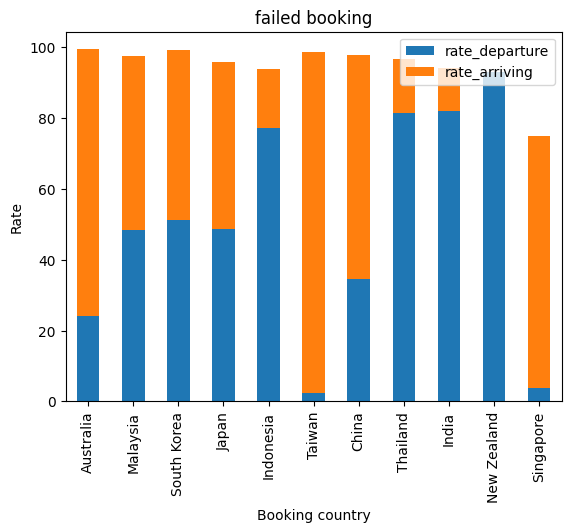

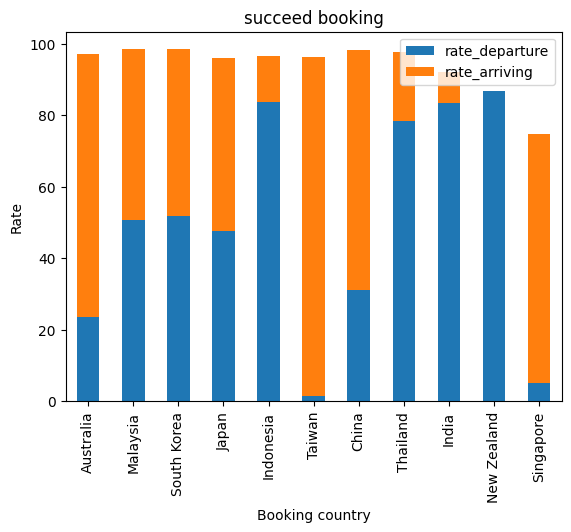

In [163]:
routes_rate_fail[['origin', 'rate_departure', 'rate_arriving']].plot(x='origin', kind='bar', stacked = True,
title = 'failed booking', xlabel = 'Booking country', ylabel = 'Rate')
routes_rate_success[['origin', 'rate_departure', 'rate_arriving']].plot(x='origin', kind='bar', stacked = True, 
title = 'succeed booking', xlabel = 'Booking country', ylabel = 'Rate')

была гипотеза, что при бронировании билета при нахождении в конкретной стране на успешность бронирований влияет то,
является ли страной вылета та страна, в которой происходит бронирование или нет. Например, находясь в Австралии, если я покупаю билеты с вылетом из Австралии, то процент неуспешных у меня меньше по сравнению с вылетом в Австралию. Т.е. можно предположить, что тогда в успешных бронированиях должно быть наоборот. Но по факту картина осталась такая же. Соотношение оформленных успешных бронирований по стране вылета осталась такая же. И такая же ситуация по всем странам из топ 10.

# 5. Исследование бронирований, сделанных в Австралии

In [164]:
df_AU = df[df['booking_origin'] == 'Australia']
df_AU.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,17691.000000,17691.000000,17691.000000,17691.000000,17691.000000,17691.000000,17691.000000,17691.000000,17691.000000
mean,1.446442,78.553389,29.134532,8.736533,0.700639,0.342151,0.507037,7.969180,0.050591
std,0.836761,80.931457,35.318102,5.583859,0.457991,0.474443,0.499965,1.321986,0.219167
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,6.000000,4.000000,0.000000,0.000000,0.000000,7.570000,0.000000
50%,1.000000,50.000000,22.000000,9.000000,1.000000,0.000000,1.000000,8.580000,0.000000
75%,2.000000,109.000000,32.000000,12.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,704.000000,778.000000,23.000000,1.000000,1.000000,1.000000,8.830000,1.000000


In [165]:
channel = df_AU.groupby('booking_complete')['sales_channel'].value_counts(normalize=True).to_frame().reset_index()
channel

,booking_complete,sales_channel,proportion
0,0,Internet,0.915218
1,0,Mobile,0.084782
2,1,Internet,0.977654
3,1,Mobile,0.022346


<Axes: xlabel='booking_complete', ylabel='proportion'>

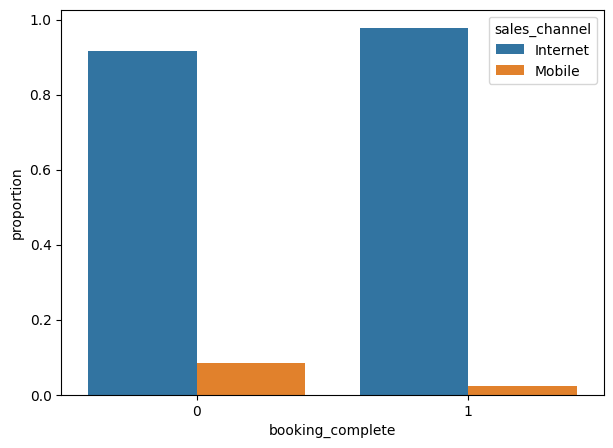

In [166]:
plt.figure(figsize=(7,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'sales_channel', data=channel, errorbar=None)


In [167]:
day = df_AU.groupby('booking_complete')['flight_day'].value_counts(normalize=True).to_frame().reset_index()
day

,booking_complete,flight_day,proportion
0,0,Mon,0.160872
1,0,Thu,0.155632
2,0,Wed,0.155454
3,0,Tue,0.150869
4,0,Fri,0.134258
5,0,Sun,0.127411
6,0,Sat,0.115504
7,1,Thu,0.169832
8,1,Wed,0.162011
9,1,Mon,0.159777


<Axes: xlabel='booking_complete', ylabel='proportion'>

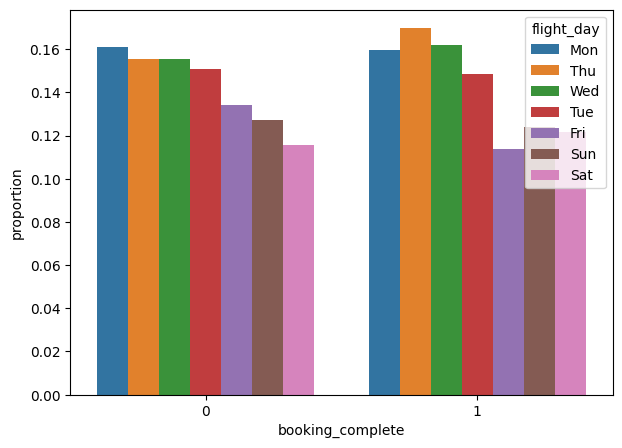

In [168]:
plt.figure(figsize=(7,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'flight_day', data=day, errorbar=None)

In [169]:
passengers=df_AU.groupby('booking_complete')['num_passengers'].value_counts(normalize=True).to_frame().reset_index()
passengers

,booking_complete,num_passengers,proportion
0,0,1,0.691117
1,0,2,0.223922
2,0,3,0.045666
3,0,4,0.028281
4,0,5,0.007204
5,0,6,0.001786
6,0,7,0.000893
7,0,8,0.000655
8,0,9,0.000476
9,1,1,0.731844


<Axes: xlabel='booking_complete', ylabel='proportion'>

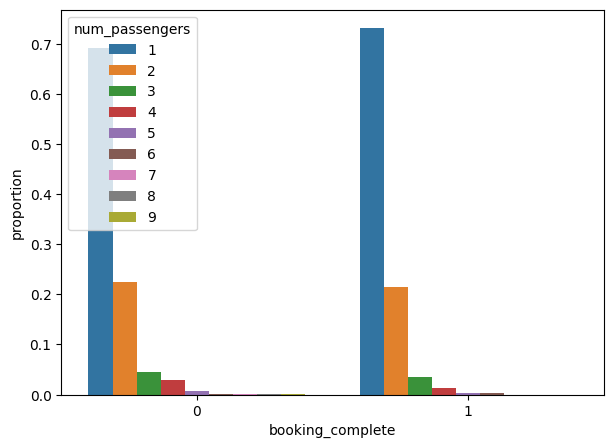

In [170]:
plt.figure(figsize=(7,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'num_passengers', data=passengers, errorbar=None)

In [171]:
trip = df_AU.groupby('booking_complete')['trip_type'].value_counts(normalize=True).to_frame().reset_index()
trip 

,booking_complete,trip_type,proportion
0,0,RoundTrip,0.988450
1,0,OneWay,0.007561
2,0,CircleTrip,0.003989
3,1,RoundTrip,0.992179
4,1,OneWay,0.005587
5,1,CircleTrip,0.002235


<Axes: xlabel='booking_complete', ylabel='proportion'>

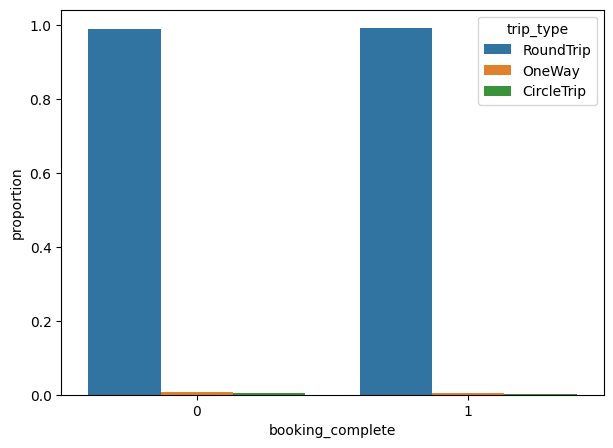

In [172]:
plt.figure(figsize=(7,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'trip_type', data=trip, errorbar=None)

In [173]:
departure_hour = df_AU.groupby('booking_complete')['flight_hour'].value_counts(normalize=True).to_frame().sort_values(['booking_complete','flight_hour']).reset_index()
departure_hour 

,booking_complete,flight_hour,proportion
0,0,0,0.043284
1,0,1,0.051024
2,0,2,0.057097
3,0,3,0.052334
4,0,4,0.052334
5,0,5,0.055013
6,0,6,0.058704
7,0,7,0.061800
8,0,8,0.062753
9,0,9,0.066444


<Axes: xlabel='booking_complete', ylabel='proportion'>

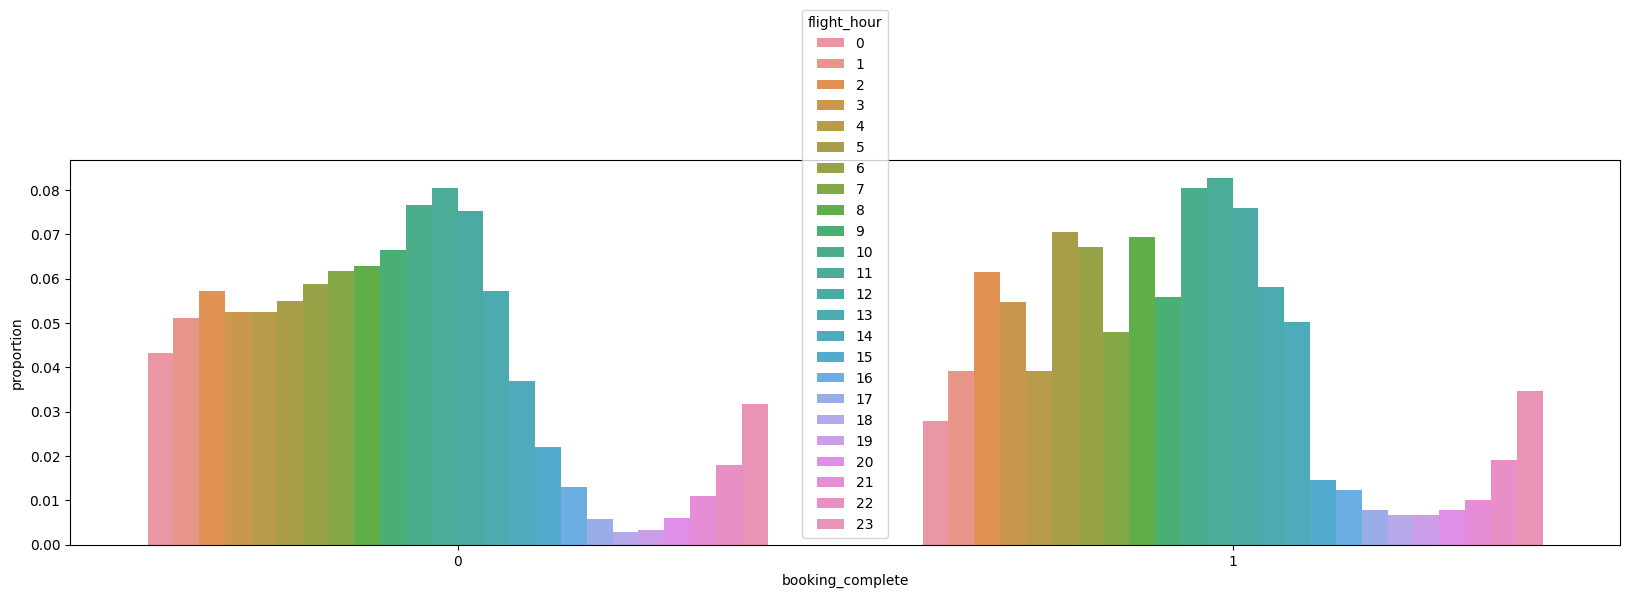

In [174]:
plt.figure(figsize=(20,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'flight_hour', data=departure_hour, errorbar=None)

In [175]:
duration_of_flight = df_AU.groupby('booking_complete')['flight_duration'].value_counts(normalize=True).to_frame().sort_values(['booking_complete', 'flight_duration']).reset_index()
duration_of_flight

,booking_complete,flight_duration,proportion
0,0,4.67,0.000595
1,0,4.72,0.000179
2,0,4.75,0.000536
3,0,5.00,0.000119
4,0,5.13,0.000060
5,0,5.33,0.000357
6,0,5.52,0.000417
7,0,5.62,0.225709
8,0,6.33,0.002798
9,0,6.42,0.001072


<Axes: xlabel='booking_complete', ylabel='proportion'>

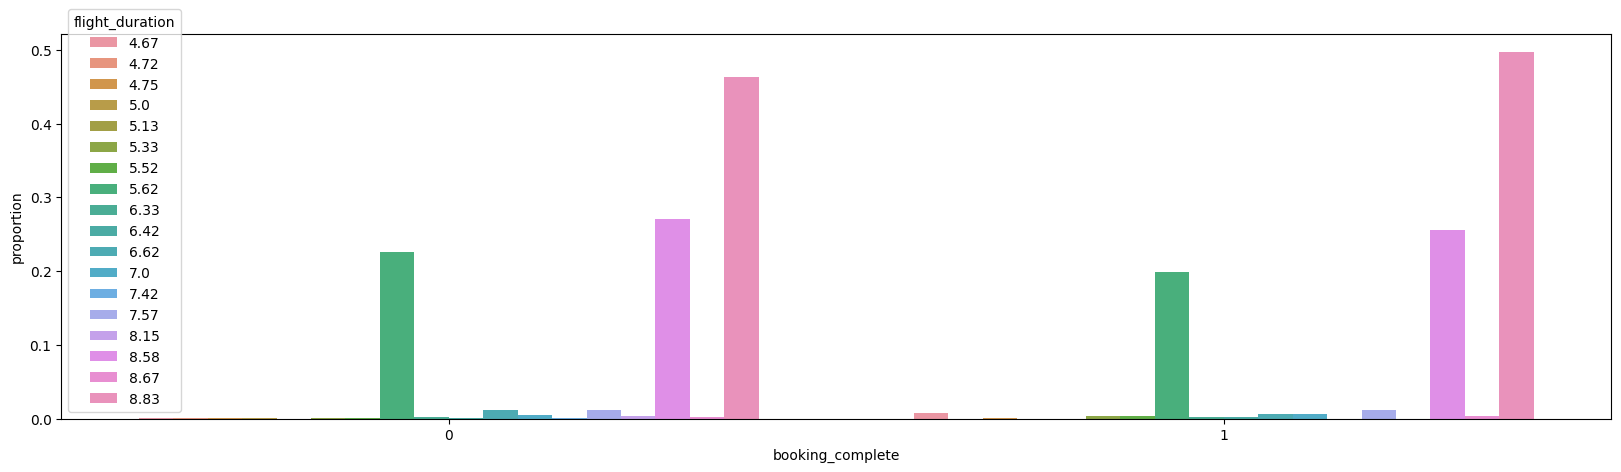

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'flight_duration', data=duration_of_flight, errorbar=None)

In [177]:
extra_baggage = df_AU.groupby('booking_complete')['wants_extra_baggage'].value_counts(normalize=True).to_frame().reset_index()
extra_baggage

,booking_complete,wants_extra_baggage,proportion
0,0,1,0.696833
1,0,0,0.303167
2,1,1,0.772067
3,1,0,0.227933


<Axes: xlabel='booking_complete', ylabel='proportion'>

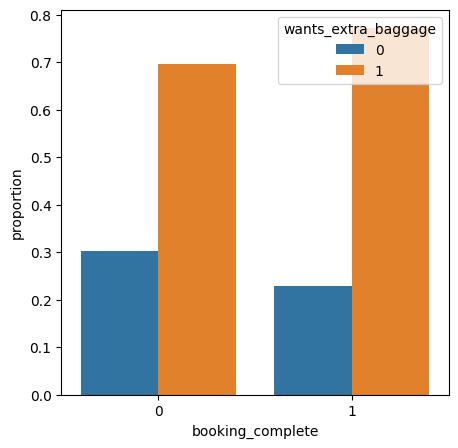

In [178]:
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'wants_extra_baggage', data=extra_baggage, errorbar=None)

In [179]:
preferred_seat = df_AU.groupby('booking_complete')['wants_preferred_seat'].value_counts(normalize=True).to_frame().reset_index()
preferred_seat

,booking_complete,wants_preferred_seat,proportion
0,0,0,0.662241
1,0,1,0.337759
2,1,0,0.575419
3,1,1,0.424581


<Axes: xlabel='booking_complete', ylabel='proportion'>

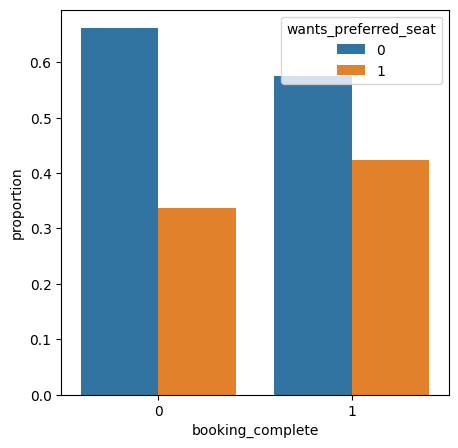

In [180]:
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'wants_preferred_seat', data=preferred_seat, errorbar=None)

In [181]:
meals = df_AU.groupby('booking_complete')['wants_in_flight_meals'].value_counts(normalize=True).to_frame().reset_index()
meals

,booking_complete,wants_in_flight_meals,proportion
0,0,1,0.502620
1,0,0,0.497380
2,1,1,0.589944
3,1,0,0.410056


<Axes: xlabel='booking_complete', ylabel='proportion'>

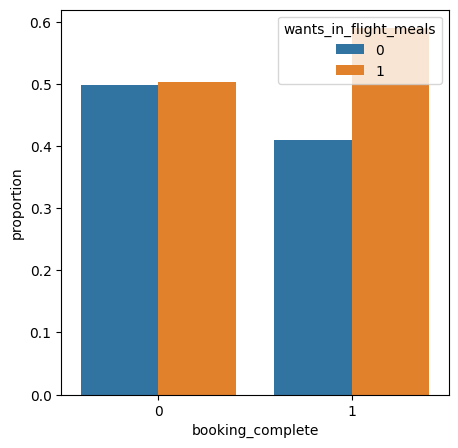

In [182]:
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
sns.barplot(x='booking_complete', y='proportion', hue = 'wants_in_flight_meals', data=meals, errorbar=None)

C:\Users\User\Python311_4\newclasswork\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


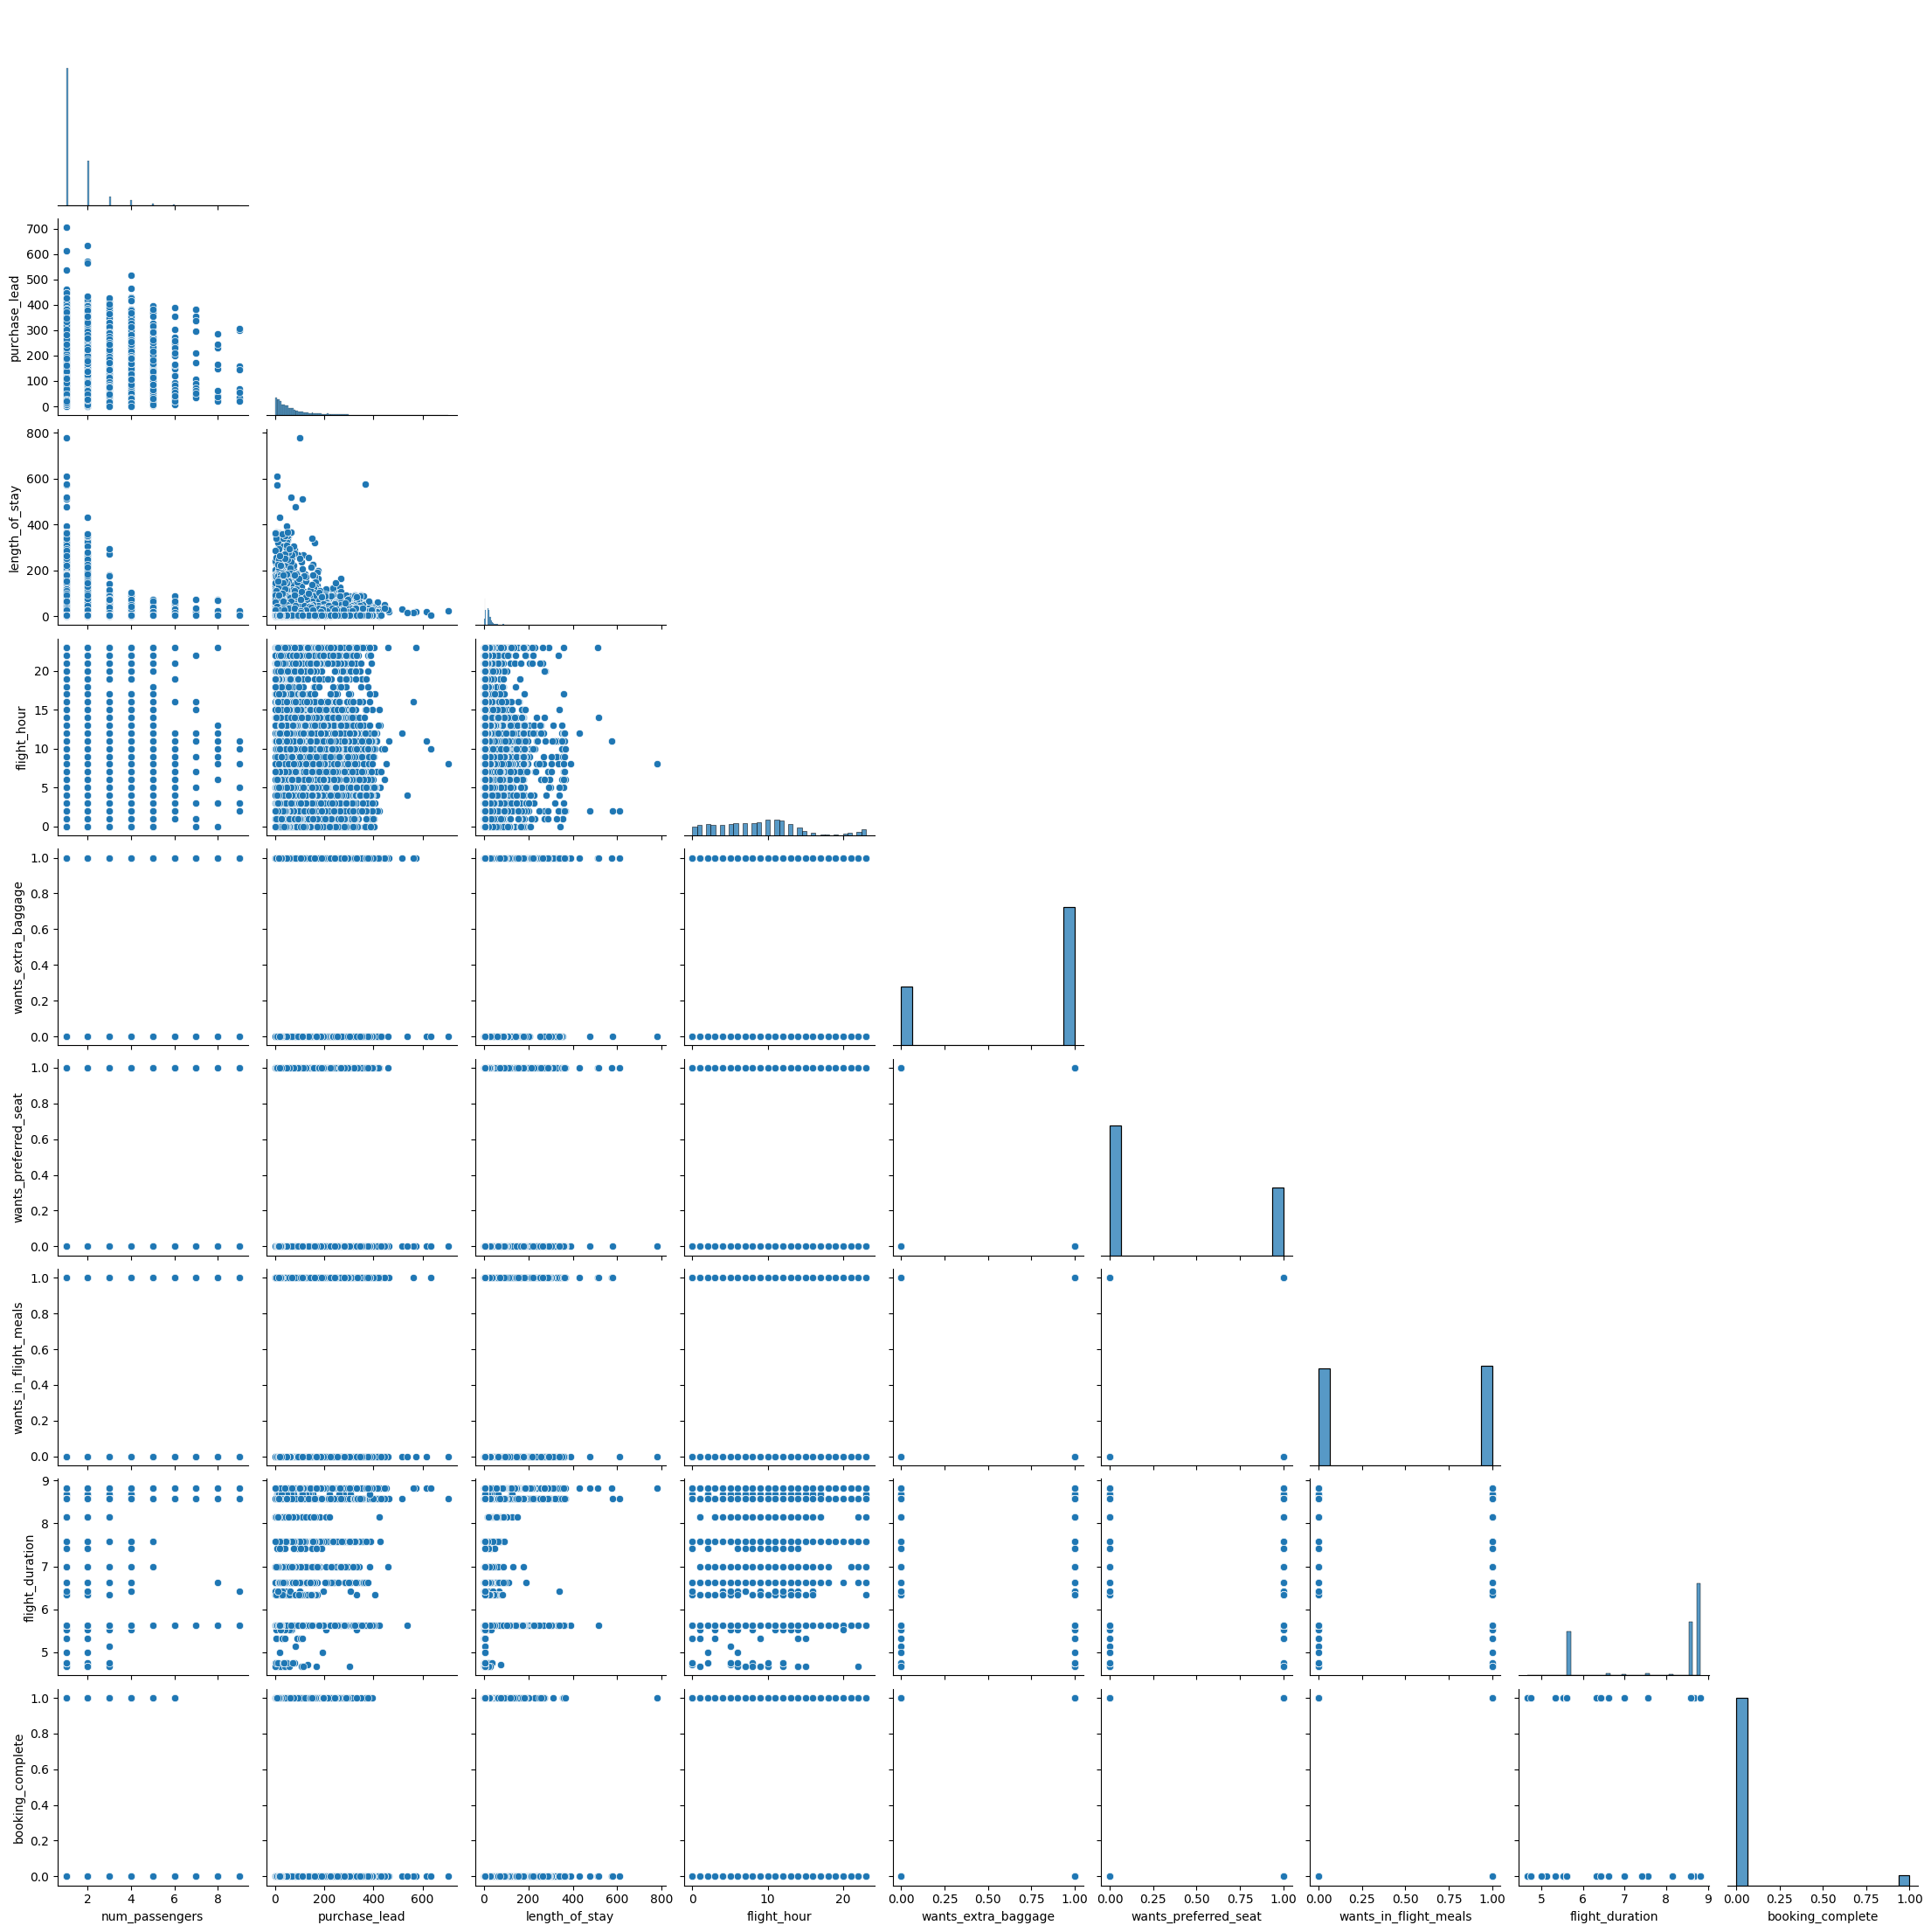

In [183]:
sns.pairplot(df_AU, corner = True)

# 6. Подготовка таблицы к дальнейшей работе в BI

In [184]:
df.loc[df['booking_complete'] == 0, 'booking_complete'] = 'Fail'
df.loc[df['booking_complete'] == 1, 'booking_complete'] = 'Success'

In [185]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,departure_air,arriving_air,departure_country,arriving_country,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,1,0,0,5.52,Fail
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,0,5.52,Fail
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,1,0,5.52,Fail
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,1,5.52,Fail
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,0,1,5.52,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail
49277,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,0,5.62,Fail
49278,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,1,5.62,Fail
49279,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail


In [186]:
num=np.arange(1, 49282)
df['pk'] = num
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,departure_air,arriving_air,departure_country,arriving_country,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,pk
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,1,0,0,5.52,Fail,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,0,5.52,Fail,2
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,1,0,5.52,Fail,3
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,1,5.52,Fail,4
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,0,1,5.52,Fail,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail,49277
49277,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,0,5.62,Fail,49278
49278,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,1,5.62,Fail,49279
49279,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail,49280


In [187]:
df.columns


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route', 'departure_air',
       'arriving_air', 'departure_country', 'arriving_country',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'pk'],
      dtype='object')

In [188]:
data_air_routes = df[['pk', 'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route', 'departure_air',
       'arriving_air', 'departure_country', 'arriving_country',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']]

In [189]:
data_air_routes

,pk,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,departure_air,arriving_air,departure_country,arriving_country,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,1,0,0,5.52,Fail
1,2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,0,5.52,Fail
2,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,1,0,5.52,Fail
3,4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,AKL,DEL,New Zealand,India,New Zealand,0,0,1,5.52,Fail
4,5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,AKL,DEL,New Zealand,India,India,1,0,1,5.52,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,49277,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail
49277,49278,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,0,5.62,Fail
49278,49279,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,PER,PNH,Australia,Cambodia,Australia,0,0,1,5.62,Fail
49279,49280,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,PER,PNH,Australia,Cambodia,Australia,1,0,1,5.62,Fail


In [190]:
data_air_routes.to_csv(r"C:\Users\User\Python311_4\newclasswork\final_project\data_air_routes.csv", index=False, sep=",")

In [191]:
data_air_routes.departure_country.value_counts()

departure_country
Thailand           6974
Malaysia           6349
Australia          6348
Indonesia          6317
India              4732
South Korea        4023
Japan              3743
New Zealand        2788
China              2144
Sri Lanka          1277
Vietnam             954
Nepal               827
Philippines         574
Hong Kong           522
Iran                391
Bangladesh          357
Cambodia            274
Brunei              197
Mauritius           137
Singapore           116
Maledives            70
Myanmar (Burma)      68
Taiwan               67
Saudi Arabia         21
Laos                 11
Name: count, dtype: int64

In [192]:
data_air_routes.arriving_country.value_counts()

arriving_country
Australia          18651
Malaysia            6904
Taiwan              3989
China               3981
Japan               3475
South Korea         3213
Singapore           2131
Vietnam             1678
Indonesia            981
Cambodia             869
India                861
Thailand             701
Nepal                584
Philippines          335
Myanmar (Burma)      290
Maledives            224
Mauritius            184
Iran                 142
Laos                  50
Hong Kong             23
Saudi Arabia          15
Name: count, dtype: int64